In [1]:
pip install tweepy

In [2]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [4]:
import re
import nltk
import tweepy
import numpy as np
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [5]:
em_tweets = pd.read_csv(r"C:\Users\peter\OneDrive\Documents\SQL\Course #3 Spark\elonmusk_tweets.csv")
#em_tweets = pd.read_csv(r"C:\Users\peter\OneDrive\Documents\SQL\Course #3 Spark\em\data_elonmusk.csv", encoding='ANSI')

In [6]:
em_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2819 entries, 0 to 2818
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          2819 non-null   int64 
 1   created_at  2819 non-null   object
 2   text        2819 non-null   object
dtypes: int64(1), object(2)
memory usage: 66.2+ KB


In [7]:
em_tweets['created_at'] = pd.to_datetime(em_tweets['created_at'])

In [8]:
em_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2819 entries, 0 to 2818
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          2819 non-null   int64         
 1   created_at  2819 non-null   datetime64[ns]
 2   text        2819 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 66.2+ KB


In [9]:
print("start_date: ", em_tweets.created_at.min())
print("end_date: ", em_tweets.created_at.max())

start_date:  2010-06-04 18:31:57
end_date:  2017-04-05 14:56:29


<AxesSubplot:>

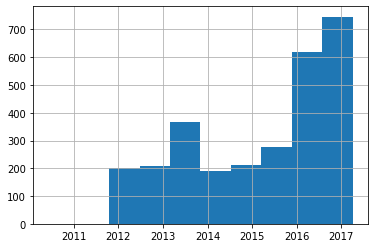

In [10]:
em_tweets.created_at.hist()

In [108]:
em_tweets['month_of_date'] = em_tweets['created_at'].dt.month
em_tweets['month_name'] = em_tweets['created_at'].dt.month_name(locale = 'English')
em_tweets

id          created_at  \
0     849636868052275200 2017-04-05 14:56:29   
1     848988730585096192 2017-04-03 20:01:01   
2     848943072423497728 2017-04-03 16:59:35   
3     848935705057280001 2017-04-03 16:30:19   
4     848416049573658624 2017-04-02 06:05:23   
...                  ...                 ...   
2814  142881284019060736 2011-12-03 08:22:07   
2815  142880871391838208 2011-12-03 08:20:28   
2816  142188458125963264 2011-12-01 10:29:04   
2817  142179928203460608 2011-12-01 09:55:11   
2818         15434727182 2010-06-04 18:31:57   

                                                                                                                                                            text  \
0                                                                                               b'And so the robots spared humanity ... https://t.co/v7JUJQWfCv'   
1     b"@ForIn2020 @waltmossberg @mims @defcon_5 Exactly. Tesla is absurdly overvalued if based on the past, but that's irr\xe2\x80\xa6 https://t.co/qQcTqkzgMl"   
2                                                                                                                  b'@waltmossberg @mims @defcon_5 Et tu, Walt?'   
3                                                                                                                            b'Stormy weather in Shortville ...'   
4                                                                              b"@DaveLeeBBC @verge Coal is dying due to nat gas fracking. It's basically dead."   
...                                                                                                                                                          ...   
2814                                                                                                                        b'That was a total non sequitur btw'   
2815                 b'Great Voltaire quote, arguably better than Twain. Hearing news of his own death, Voltaire replied the reports were true, only premature.'   
2816                                    b'I made the volume on the Model S http://t.co/wMCnT53M go to 11.  Now I just need to work in a miniature Stonehenge...'   
2817             b"Went to Iceland on Sat to ride bumper cars on ice!  No, not the country, Vlad's rink in Van Nuys. Awesome family fun :) http://t.co/rBQXJ9IT"   
2818                                                             b'Please ignore prior tweets, as that was someone pretending to be me :)  This is actually me.'   

      month_of_date  hour  \
0                 4    14   
1                 4    20   
2                 4    16   
3                 4    16   
4                 4     6   
...             ...   ...   
2814             12     8   
2815             12     8   
2816             12    10   
2817             12     9   
2818              6    18   

                                                                                                                                       text_decode  \
0                                                                                    And so the robots spared humanity ... https://t.co/v7JUJQWfCv   
1     @ForIn2020 @waltmossberg @mims @defcon_5 Exactly. Tesla is absurdly overvalued if based on the past, but that's irr… https://t.co/qQcTqkzgMl   
2                                                                                                       @waltmossberg @mims @defcon_5 Et tu, Walt?   
3                                                                                                                 Stormy weather in Shortville ...   
4                                                                   @DaveLeeBBC @verge Coal is dying due to nat gas fracking. It's basically dead.   
...                                                                                                                                            ...   
2814                                                                         

<AxesSubplot:>

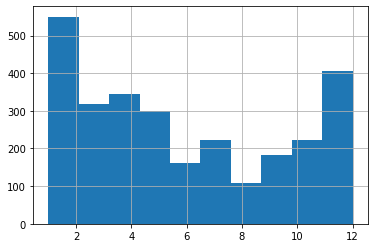

In [109]:
em_tweets.month_of_date.hist()

In [112]:
em_tweets_month = pysqldf("SELECT month_name, Count(month_name) as Total_Tweets FROM em_tweets Group By month_name Order By month_of_date;")
em_tweets_month

month_name  Total_Tweets
0     January           254
1    February           296
2       March           317
3       April           346
4         May           300
5        June           162
6        July           223
7      August           108
8   September           183
9     October           223
10   November           193
11   December           214

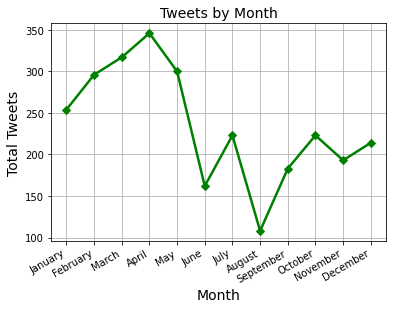

In [114]:
plt.plot(em_tweets_month['month_name'], em_tweets_month['Total_Tweets'], color='green', marker='D' , linewidth=2.5)
plt.title('Tweets by Month', fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Tweets', fontsize=14)
plt.xticks(rotation=30, ha='right')
plt.grid(True)
plt.show()

In [13]:
em_tweets['hour'] = em_tweets['created_at'].dt.hour

<AxesSubplot:>

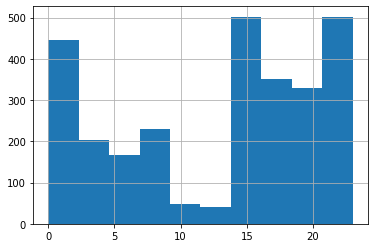

In [87]:
em_tweets.hour.hist()

In [91]:
em_tweets_hour = pysqldf("SELECT hour, Count(hour) as Total_Tweets FROM em_tweets Group By hour;")
em_tweets_hour

hour  Total_Tweets
0      0           144
1      1           183
2      2           119
3      3           104
4      4            98
5      5            81
6      6            85
7      7            94
8      8            82
9      9            55
10    10            34
11    11            15
12    12            17
13    13            23
14    14           114
15    15           190
16    16           198
17    17           190
18    18           162
19    19           154
20    20           176
21    21           192
22    22           168
23    23           141

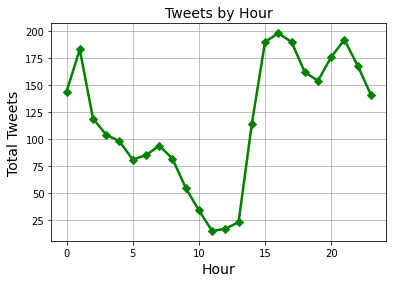

In [97]:
plt.plot(em_tweets_hour['hour'], em_tweets_hour['Total_Tweets'], color='green', marker='D' , linewidth=2.5)
plt.title('Tweets by Hour', fontsize=14)
plt.xlabel('Hour', fontsize=14)
plt.ylabel('Total Tweets', fontsize=14)
plt.grid(True)
plt.show()

In [15]:
pd.set_option('display.max_colwidth', -1)
em_tweets.head(25)

<ipython-input-15-120826c3df9f>:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


id          created_at  \
0   849636868052275200 2017-04-05 14:56:29   
1   848988730585096192 2017-04-03 20:01:01   
2   848943072423497728 2017-04-03 16:59:35   
3   848935705057280001 2017-04-03 16:30:19   
4   848416049573658624 2017-04-02 06:05:23   
5   848415731502923777 2017-04-02 06:04:07   
6   848415356263702528 2017-04-02 06:02:38   
7   848398971139629057 2017-04-02 04:57:31   
8   848244577521647616 2017-04-01 18:44:01   
9   848243350993895424 2017-04-01 18:39:09   
10  848239928043491328 2017-04-01 18:25:33   
11  848239664536223745 2017-04-01 18:24:30   
12  848036043240636417 2017-04-01 04:55:23   
13  847958571895619584 2017-03-31 23:47:32   
14  847890916048338946 2017-03-31 19:18:42   
15  847884776719740928 2017-03-31 18:54:18   
16  847884413706874880 2017-03-31 18:52:51   
17  847884351375372288 2017-03-31 18:52:36   
18  847883435100299267 2017-03-31 18:48:58   
19  847882909906341888 2017-03-31 18:46:53   
20  847882289581359104 2017-03-31 18:44:25   
21  847881536254955521 2017-03-31 18:41:25   
22  847610880506208257 2017-03-31 00:45:56   
23  847608431582208000 2017-03-31 00:36:12   
24  847594208219336705 2017-03-30 23:39:41   

                                                                                                                                                          text  \
0   b'And so the robots spared humanity ... https://t.co/v7JUJQWfCv'                                                                                             
1   b"@ForIn2020 @waltmossberg @mims @defcon_5 Exactly. Tesla is absurdly overvalued if based on the past, but that's irr\xe2\x80\xa6 https://t.co/qQcTqkzgMl"   
2   b'@waltmossberg @mims @defcon_5 Et tu, Walt?'                                                                                                                
3   b'Stormy weather in Shortville ...'                                                                                                                          
4   b"@DaveLeeBBC @verge Coal is dying due to nat gas fracking. It's basically dead."                                                                            
5   b"@Lexxxzis It's just a helicopter in helicopter's clothing"                                                                                                 
6   b"@verge It won't matter"                                                                                                                                    
7   b'@SuperCoolCube Pretty good'                                                                                                                                
8   b"Why did we waste so much time developing silly rockets? Damn you, aliens! So obtuse! You have all this crazy tech, but can't speak English!?"              
9   b'Technology breakthrough: turns out chemtrails are actually a message from time-traveling aliens describing the secret of teleportation'                    
10  b"RT @OpenAI: We've created the world's first Spam-detecting AI trained entirely in simulation and deployed on a physical robot: https://t.co\xe2\x80\xa6"   
11  b'RT @ProfBrianCox: This is extremely important from @elonmusk and @SpaceX - reusable rockets bring us MUCH closer to becoming a spacefaring\xe2\x80\xa6'    
12  b'@adamsbj Def P100D with Ludicrous+, although the rocket starts going a lot faster after that'                                                              
13  b'@BadAstronomer We can def bring it back like Dragon. Just a question of how much weight we need to add.'                                                   
14  b'@tesla_addict @TeslaMotors Working on it'                                                                                                                  
15  b"@jasonlamb Looks like it could do 20% more with some structural upgrades to handle higher loads. But that's in fully expendable mode."                     
16  b'@cheron A lot'                                                 

In [16]:
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

In [17]:
pysqldf("SELECT * FROM em_tweets;")

id                  created_at  \
0     849636868052275200  2017-04-05 14:56:29.000000   
1     848988730585096192  2017-04-03 20:01:01.000000   
2     848943072423497728  2017-04-03 16:59:35.000000   
3     848935705057280001  2017-04-03 16:30:19.000000   
4     848416049573658624  2017-04-02 06:05:23.000000   
...                  ...                         ...   
2814  142881284019060736  2011-12-03 08:22:07.000000   
2815  142880871391838208  2011-12-03 08:20:28.000000   
2816  142188458125963264  2011-12-01 10:29:04.000000   
2817  142179928203460608  2011-12-01 09:55:11.000000   
2818  15434727182         2010-06-04 18:31:57.000000   

                                                                                                                                                            text  \
0     b'And so the robots spared humanity ... https://t.co/v7JUJQWfCv'                                                                                             
1     b"@ForIn2020 @waltmossberg @mims @defcon_5 Exactly. Tesla is absurdly overvalued if based on the past, but that's irr\xe2\x80\xa6 https://t.co/qQcTqkzgMl"   
2     b'@waltmossberg @mims @defcon_5 Et tu, Walt?'                                                                                                                
3     b'Stormy weather in Shortville ...'                                                                                                                          
4     b"@DaveLeeBBC @verge Coal is dying due to nat gas fracking. It's basically dead."                                                                            
...                                                                                 ...                                                                            
2814  b'That was a total non sequitur btw'                                                                                                                         
2815  b'Great Voltaire quote, arguably better than Twain. Hearing news of his own death, Voltaire replied the reports were true, only premature.'                  
2816  b'I made the volume on the Model S http://t.co/wMCnT53M go to 11.  Now I just need to work in a miniature Stonehenge...'                                     
2817  b"Went to Iceland on Sat to ride bumper cars on ice!  No, not the country, Vlad's rink in Van Nuys. Awesome family fun :) http://t.co/rBQXJ9IT"              
2818  b'Please ignore prior tweets, as that was someone pretending to be me :)  This is actually me.'                                                              

      month_of_date  hour  
0     4              14    
1     4              20    
2     4              16    
3     4              16    
4     4              6     
...  ..             ..     
2814  12             8     
2815  12             8     
2816  12             10    
2817  12             9     
2818  6              18    

[2819 rows x 5 columns]

In [18]:
import ast

em_tweets['text_decode'] = em_tweets['text'].apply(lambda x: ast.literal_eval(x).decode("utf-8"))
em_tweets[:50]

id          created_at  \
0   849636868052275200 2017-04-05 14:56:29   
1   848988730585096192 2017-04-03 20:01:01   
2   848943072423497728 2017-04-03 16:59:35   
3   848935705057280001 2017-04-03 16:30:19   
4   848416049573658624 2017-04-02 06:05:23   
5   848415731502923777 2017-04-02 06:04:07   
6   848415356263702528 2017-04-02 06:02:38   
7   848398971139629057 2017-04-02 04:57:31   
8   848244577521647616 2017-04-01 18:44:01   
9   848243350993895424 2017-04-01 18:39:09   
10  848239928043491328 2017-04-01 18:25:33   
11  848239664536223745 2017-04-01 18:24:30   
12  848036043240636417 2017-04-01 04:55:23   
13  847958571895619584 2017-03-31 23:47:32   
14  847890916048338946 2017-03-31 19:18:42   
15  847884776719740928 2017-03-31 18:54:18   
16  847884413706874880 2017-03-31 18:52:51   
17  847884351375372288 2017-03-31 18:52:36   
18  847883435100299267 2017-03-31 18:48:58   
19  847882909906341888 2017-03-31 18:46:53   
20  847882289581359104 2017-03-31 18:44:25   
21  847881536254955521 2017-03-31 18:41:25   
22  847610880506208257 2017-03-31 00:45:56   
23  847608431582208000 2017-03-31 00:36:12   
24  847594208219336705 2017-03-30 23:39:41   
25  847580067446345728 2017-03-30 22:43:30   
26  847561780532523008 2017-03-30 21:30:50   
27  847510437054877698 2017-03-30 18:06:48   
28  847259545755820033 2017-03-30 01:29:51   
29  847234747747020800 2017-03-29 23:51:19   
30  847178475970547712 2017-03-29 20:07:43   
31  846772378067648513 2017-03-28 17:14:01   
32  846770102502473728 2017-03-28 17:04:59   
33  846768497904369664 2017-03-28 16:58:36   
34  846768171486855169 2017-03-28 16:57:18   
35  846668569576259584 2017-03-28 10:21:31   
36  846668345998925826 2017-03-28 10:20:38   
37  846667837716410368 2017-03-28 10:18:37   
38  846580443797368832 2017-03-28 04:31:21   
39  845447146111303681 2017-03-25 01:28:01   
40  845403535353143299 2017-03-24 22:34:44   
41  845402066629517312 2017-03-24 22:28:54   
42  845370779298521088 2017-03-24 20:24:34   
43  845355766357737472 2017-03-24 19:24:55   
44  845337811876114432 2017-03-24 18:13:34   
45  845331893176324096 2017-03-24 17:50:03   
46  845325721455149056 2017-03-24 17:25:32   
47  845294849049870337 2017-03-24 15:22:51   
48  845294411072204801 2017-03-24 15:21:07   
49  845294161125269505 2017-03-24 15:20:07   

                                                                                                                                                                           text  \
0   b'And so the robots spared humanity ... https://t.co/v7JUJQWfCv'                                                                                                              
1   b"@ForIn2020 @waltmossberg @mims @defcon_5 Exactly. Tesla is absurdly overvalued if based on the past, but that's irr\xe2\x80\xa6 https://t.co/qQcTqkzgMl"                    
2   b'@waltmossberg @mims @defcon_5 Et tu, Walt?'                                                                                                                                 
3   b'Stormy weather in Shortville ...'                                                                                                                                           
4   b"@DaveLeeBBC @verge Coal is dying due to nat gas fracking. It's basically dead."                                                                                             
5   b"@Lexxxzis It's just a helicopter in helicopter's clothing"                                                                                                                  
6   b"@verge It won't matter"                                                                                                                                                     
7   b'@SuperCoolCube Pretty good'                                                                                                                                                 
8   b"Why did we waste so much time developing silly rockets? 

In [19]:
for tweet in em_tweets.text_decode:
    if (tweet[:2] == '.@'):
        print(tweet)

.@mcannonbrookes Can only happen with your support, and working closely with key govt and utility leaders who are s… https://t.co/AlfAGI0kLB
.@curtismcauliff SpaceX has not donated to any presidential campaign
.@jbmeicher Model S works great in cold. Highest sales/capita are in Norway and we have a ton of customers in Canada.
.@benmacy $30k in 2013 $ (ie + inflation) w 200+ mile range w some really cool tech that we can't talk about yet.
.@joshj777 It has always been my dream to produce a low cost, compelling electric car. We are 3 to 4 years away. Wish it could be sooner.


In [20]:
def word_count(str):
        counts = dict()
        words = str.split()
        
        for word in words:
            if word in counts:
                counts[word] += 1
            else:
                counts[word] = 1
        return counts
    
def tweet_counts(tweet_array, threshold = 10):
    unique, counts = np.unique(np.array(tweet_array), return_counts = True)
    count_dict = dict(zip(unique, counts))
    
    return [(k, v) for k , v in count_dict.items() if v > threshold]

In [21]:
who_he_replies_to = []
for tweet in em_tweets.text_decode:
    if (tweet[:1] == '@'):
        parts = tweet.split()
        for i in range(0, len(parts)):
            if (parts[i][0] == '@'):
                who_he_replies_to.append(parts[i])

In [22]:
tweet_counts(who_he_replies_to, 5)

[('@FortuneMagazine', 7),
 ('@FredericLambert', 16),
 ('@ID_AA_Carmack', 14),
 ('@John_Gardi', 6),
 ('@MacTechGenius', 11),
 ('@SpaceX', 18),
 ('@SwiftOnSecurity', 8),
 ('@TeslaMotors', 32),
 ('@bonnienorman', 6),
 ('@danahull', 8),
 ('@elonmusk', 12),
 ('@mcannonbrookes', 6),
 ('@vicentes', 14)]

In [23]:
replies_df = pd.DataFrame(tweet_counts(who_he_replies_to, 5),columns=['who', 'count']).sort_values('count', ascending = False)
replies_df

who  count
7   @TeslaMotors      32   
5   @SpaceX           18   
1   @FredericLambert  16   
2   @ID_AA_Carmack    14   
12  @vicentes         14   
10  @elonmusk         12   
4   @MacTechGenius    11   
6   @SwiftOnSecurity  8    
9   @danahull         8    
0   @FortuneMagazine  7    
3   @John_Gardi       6    
8   @bonnienorman     6    
11  @mcannonbrookes   6

In [24]:
for tweet in em_tweets.text_decode:
    if (tweet[:1] != '@'):
        print(tweet)

And so the robots spared humanity ... https://t.co/v7JUJQWfCv
Stormy weather in Shortville ...
Why did we waste so much time developing silly rockets? Damn you, aliens! So obtuse! You have all this crazy tech, but can't speak English!?
Technology breakthrough: turns out chemtrails are actually a message from time-traveling aliens describing the secret of teleportation
RT @OpenAI: We've created the world's first Spam-detecting AI trained entirely in simulation and deployed on a physical robot: https://t.co…
RT @ProfBrianCox: This is extremely important from @elonmusk and @SpaceX - reusable rockets bring us MUCH closer to becoming a spacefaring…
Falcon Heavy test flight currently scheduled for late summer
Considering trying to bring upper stage back on Falcon Heavy demo flight for full reusability. Odds of success low, but maybe worth a shot.
RT @SpaceX: More photos from today’s Falcon 9 launch and first stage landing → https://t.co/095WHX44BX https://t.co/c3UYhMrDec
Incredibly proud of 

In [25]:
who_he_rts = []
for tweet in em_tweets.text_decode:
    if (tweet[:2] == 'RT'):
        splits = tweet.split(": ")
        rt, who = splits[0].split(" ") 
        #who = splits[0]
        who_he_rts.append(who)
        #who_he_rts = !who_he_rts![2:]
        
tweet_counts(who_he_rts, 5)  
sorted(tweet_counts(who_he_rts, 5), key = lambda x: x[1], reverse = True)

[('@SpaceX', 105),
 ('@TeslaMotors', 81),
 ('@NASA', 16),
 ('@WIRED', 9),
 ('@OpenAI', 7),
 ('@TheOnion', 7),
 ('@ElectrekCo', 6),
 ('@Hyperloop', 6),
 ('@TheEconomist', 6),
 ('@verge', 6),
 ('@westcoastbill', 6)]

In [26]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [27]:
import nltk

nltk.download([
    "names",
     "stopwords",
     "state_union",
     "twitter_samples",
     "movie_reviews",
    "averaged_perceptron_tagger",
     "vader_lexicon",
     "punkt",
 ])

[nltk_data] Downloading package names to
[nltk_data]     C:\Users\peter\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\peter\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package state_union to
[nltk_data]     C:\Users\peter\AppData\Roaming\nltk_data...
[nltk_data]   Package state_union is already up-to-date!
[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\peter\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\peter\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\peter\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up

True

In [28]:
em_tweets['polarity'] = em_tweets.apply(lambda x: TextBlob(x['text_decode']).sentiment.polarity, axis=1)
em_tweets['subjectivity'] = em_tweets.apply(lambda x: TextBlob(x['text_decode']).sentiment.subjectivity, axis=1)


In [29]:
em_tweets

id          created_at  \
0     849636868052275200 2017-04-05 14:56:29   
1     848988730585096192 2017-04-03 20:01:01   
2     848943072423497728 2017-04-03 16:59:35   
3     848935705057280001 2017-04-03 16:30:19   
4     848416049573658624 2017-04-02 06:05:23   
...                  ...                 ...   
2814  142881284019060736 2011-12-03 08:22:07   
2815  142880871391838208 2011-12-03 08:20:28   
2816  142188458125963264 2011-12-01 10:29:04   
2817  142179928203460608 2011-12-01 09:55:11   
2818  15434727182        2010-06-04 18:31:57   

                                                                                                                                                            text  \
0     b'And so the robots spared humanity ... https://t.co/v7JUJQWfCv'                                                                                             
1     b"@ForIn2020 @waltmossberg @mims @defcon_5 Exactly. Tesla is absurdly overvalued if based on the past, but that's irr\xe2\x80\xa6 https://t.co/qQcTqkzgMl"   
2     b'@waltmossberg @mims @defcon_5 Et tu, Walt?'                                                                                                                
3     b'Stormy weather in Shortville ...'                                                                                                                          
4     b"@DaveLeeBBC @verge Coal is dying due to nat gas fracking. It's basically dead."                                                                            
...                                                                                 ...                                                                            
2814  b'That was a total non sequitur btw'                                                                                                                         
2815  b'Great Voltaire quote, arguably better than Twain. Hearing news of his own death, Voltaire replied the reports were true, only premature.'                  
2816  b'I made the volume on the Model S http://t.co/wMCnT53M go to 11.  Now I just need to work in a miniature Stonehenge...'                                     
2817  b"Went to Iceland on Sat to ride bumper cars on ice!  No, not the country, Vlad's rink in Van Nuys. Awesome family fun :) http://t.co/rBQXJ9IT"              
2818  b'Please ignore prior tweets, as that was someone pretending to be me :)  This is actually me.'                                                              

      month_of_date  hour  \
0     4              14     
1     4              20     
2     4              16     
3     4              16     
4     4              6      
...  ..             ..      
2814  12             8      
2815  12             8      
2816  12             10     
2817  12             9      
2818  6              18     

                                                                                                                                       text_decode  \
0     And so the robots spared humanity ... https://t.co/v7JUJQWfCv                                                                                  
1     @ForIn2020 @waltmossberg @mims @defcon_5 Exactly. Tesla is absurdly overvalued if based on the past, but that's irr… https://t.co/qQcTqkzgMl   
2     @waltmossberg @mims @defcon_5 Et tu, Walt?                                                                                                     
3     Stormy weather in Shortville ...                                                                                                               
4     @DaveLeeBBC @verge Coal is dying due to nat gas fracking. It's basically dead.                                                                 
...                                                                              ...                                                                 
2814  That was a total non sequitur btw                                      

<AxesSubplot:>

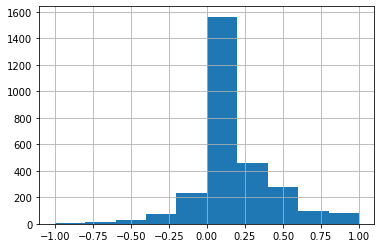

In [30]:
em_tweets.polarity.hist()

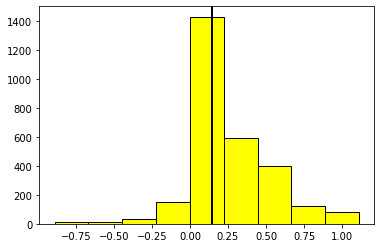

In [84]:
plt.hist(em_tweets['polarity'], bins=9, align='right', color='yellow', edgecolor='black')
plt.axvline(em_tweets['polarity'].mean(), color='k', linestyle='solid', linewidth=2)
plt.show()


<AxesSubplot:>

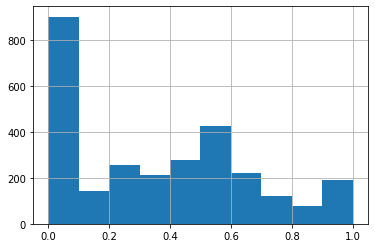

In [31]:
em_tweets.subjectivity.hist()

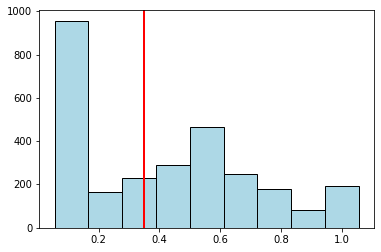

In [85]:
plt.hist(em_tweets['subjectivity'], bins=9, align='right', color='lightblue', edgecolor='black')
plt.axvline(em_tweets['subjectivity'].mean(), color='red', linestyle='solid', linewidth=2)
plt.show()

In [36]:

df =pd.read_csv(r"C:\Users\peter\OneDrive\Documents\SQL\Course #3 Spark\elonmusk_tweets.csv")#loads csv file into pandas dataframe
pd.options.display.max_colwidth = 200 
df.head() #prints out first few columns in a dataframe

id           created_at  \
0  849636868052275200  2017-04-05 14:56:29   
1  848988730585096192  2017-04-03 20:01:01   
2  848943072423497728  2017-04-03 16:59:35   
3  848935705057280001  2017-04-03 16:30:19   
4  848416049573658624  2017-04-02 06:05:23   

                                                                                                                                                         text  
0                                                                                            b'And so the robots spared humanity ... https://t.co/v7JUJQWfCv'  
1  b"@ForIn2020 @waltmossberg @mims @defcon_5 Exactly. Tesla is absurdly overvalued if based on the past, but that's irr\xe2\x80\xa6 https://t.co/qQcTqkzgMl"  
2                                                                                                               b'@waltmossberg @mims @defcon_5 Et tu, Walt?'  
3                                                                                                                         b'Stormy weather in Shortville ...'  
4                                                                           b"@DaveLeeBBC @verge Coal is dying due to nat gas fracking. It's basically dead."

In [33]:
df.shape

(2819, 3)

In [39]:
df=df.drop(['id', 'created_at'], axis = 1)
df.shape

(2819, 1)

In [40]:
df

text
0                                                                                               b'And so the robots spared humanity ... https://t.co/v7JUJQWfCv'
1     b"@ForIn2020 @waltmossberg @mims @defcon_5 Exactly. Tesla is absurdly overvalued if based on the past, but that's irr\xe2\x80\xa6 https://t.co/qQcTqkzgMl"
2                                                                                                                  b'@waltmossberg @mims @defcon_5 Et tu, Walt?'
3                                                                                                                            b'Stormy weather in Shortville ...'
4                                                                              b"@DaveLeeBBC @verge Coal is dying due to nat gas fracking. It's basically dead."
...                                                                                                                                                          ...
2814                                                                                                                        b'That was a total non sequitur btw'
2815                 b'Great Voltaire quote, arguably better than Twain. Hearing news of his own death, Voltaire replied the reports were true, only premature.'
2816                                    b'I made the volume on the Model S http://t.co/wMCnT53M go to 11.  Now I just need to work in a miniature Stonehenge...'
2817             b"Went to Iceland on Sat to ride bumper cars on ice!  No, not the country, Vlad's rink in Van Nuys. Awesome family fun :) http://t.co/rBQXJ9IT"
2818                                                             b'Please ignore prior tweets, as that was someone pretending to be me :)  This is actually me.'

[2819 rows x 1 columns]

In [47]:
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer
token = WordPunctTokenizer()
def cleaning_tweets(t):
    del_amp = BeautifulSoup(t, 'lxml')
    del_amp_text = del_amp.get_text()
    re_list = ['@[A-Za-z0–9_]+', '#']
    combined_re = re.compile( '|'.join( re_list) )
    del_link_mentions = re.sub(combined_re, '', del_amp_text)
    del_emoticons = re.sub(regex_pattern, '', del_link_mentions)
    lower_case = del_emoticons.lower()
    words = token.tokenize(lower_case)
    result_words = [x for x in words if len(x) > 2]
    return (" ".join(result_words)).strip()

In [48]:
print("Cleaning the tweets...\n")
cleaned_tweets = []
for i in range(0,2819): #2819 columns in our dataframe
    if( (i+1)%100 == 0 ):
        print("Tweets {} of {} have been processed".format(i+1,2819))                                                                  
    cleaned_tweets.append(cleaning_tweets((df.text[i])))

Cleaning the tweets...

Tweets 100 of 2819 have been processed
Tweets 200 of 2819 have been processed
Tweets 300 of 2819 have been processed
Tweets 400 of 2819 have been processed
Tweets 500 of 2819 have been processed
Tweets 600 of 2819 have been processed
Tweets 700 of 2819 have been processed
Tweets 800 of 2819 have been processed
Tweets 900 of 2819 have been processed
Tweets 1000 of 2819 have been processed
Tweets 1100 of 2819 have been processed
Tweets 1200 of 2819 have been processed
Tweets 1300 of 2819 have been processed
Tweets 1400 of 2819 have been processed
Tweets 1500 of 2819 have been processed
Tweets 1600 of 2819 have been processed
Tweets 1700 of 2819 have been processed
Tweets 1800 of 2819 have been processed
Tweets 1900 of 2819 have been processed
Tweets 2000 of 2819 have been processed
Tweets 2100 of 2819 have been processed
Tweets 2200 of 2819 have been processed
Tweets 2300 of 2819 have been processed
Tweets 2400 of 2819 have been processed
Tweets 2500 of 2819 have 

In [49]:
string = pd.Series(cleaned_tweets).str.cat(sep=' ')

In [52]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)
stopwords.update(["elonmusk","elon musk","elon","musk","spacex", "https"]) 

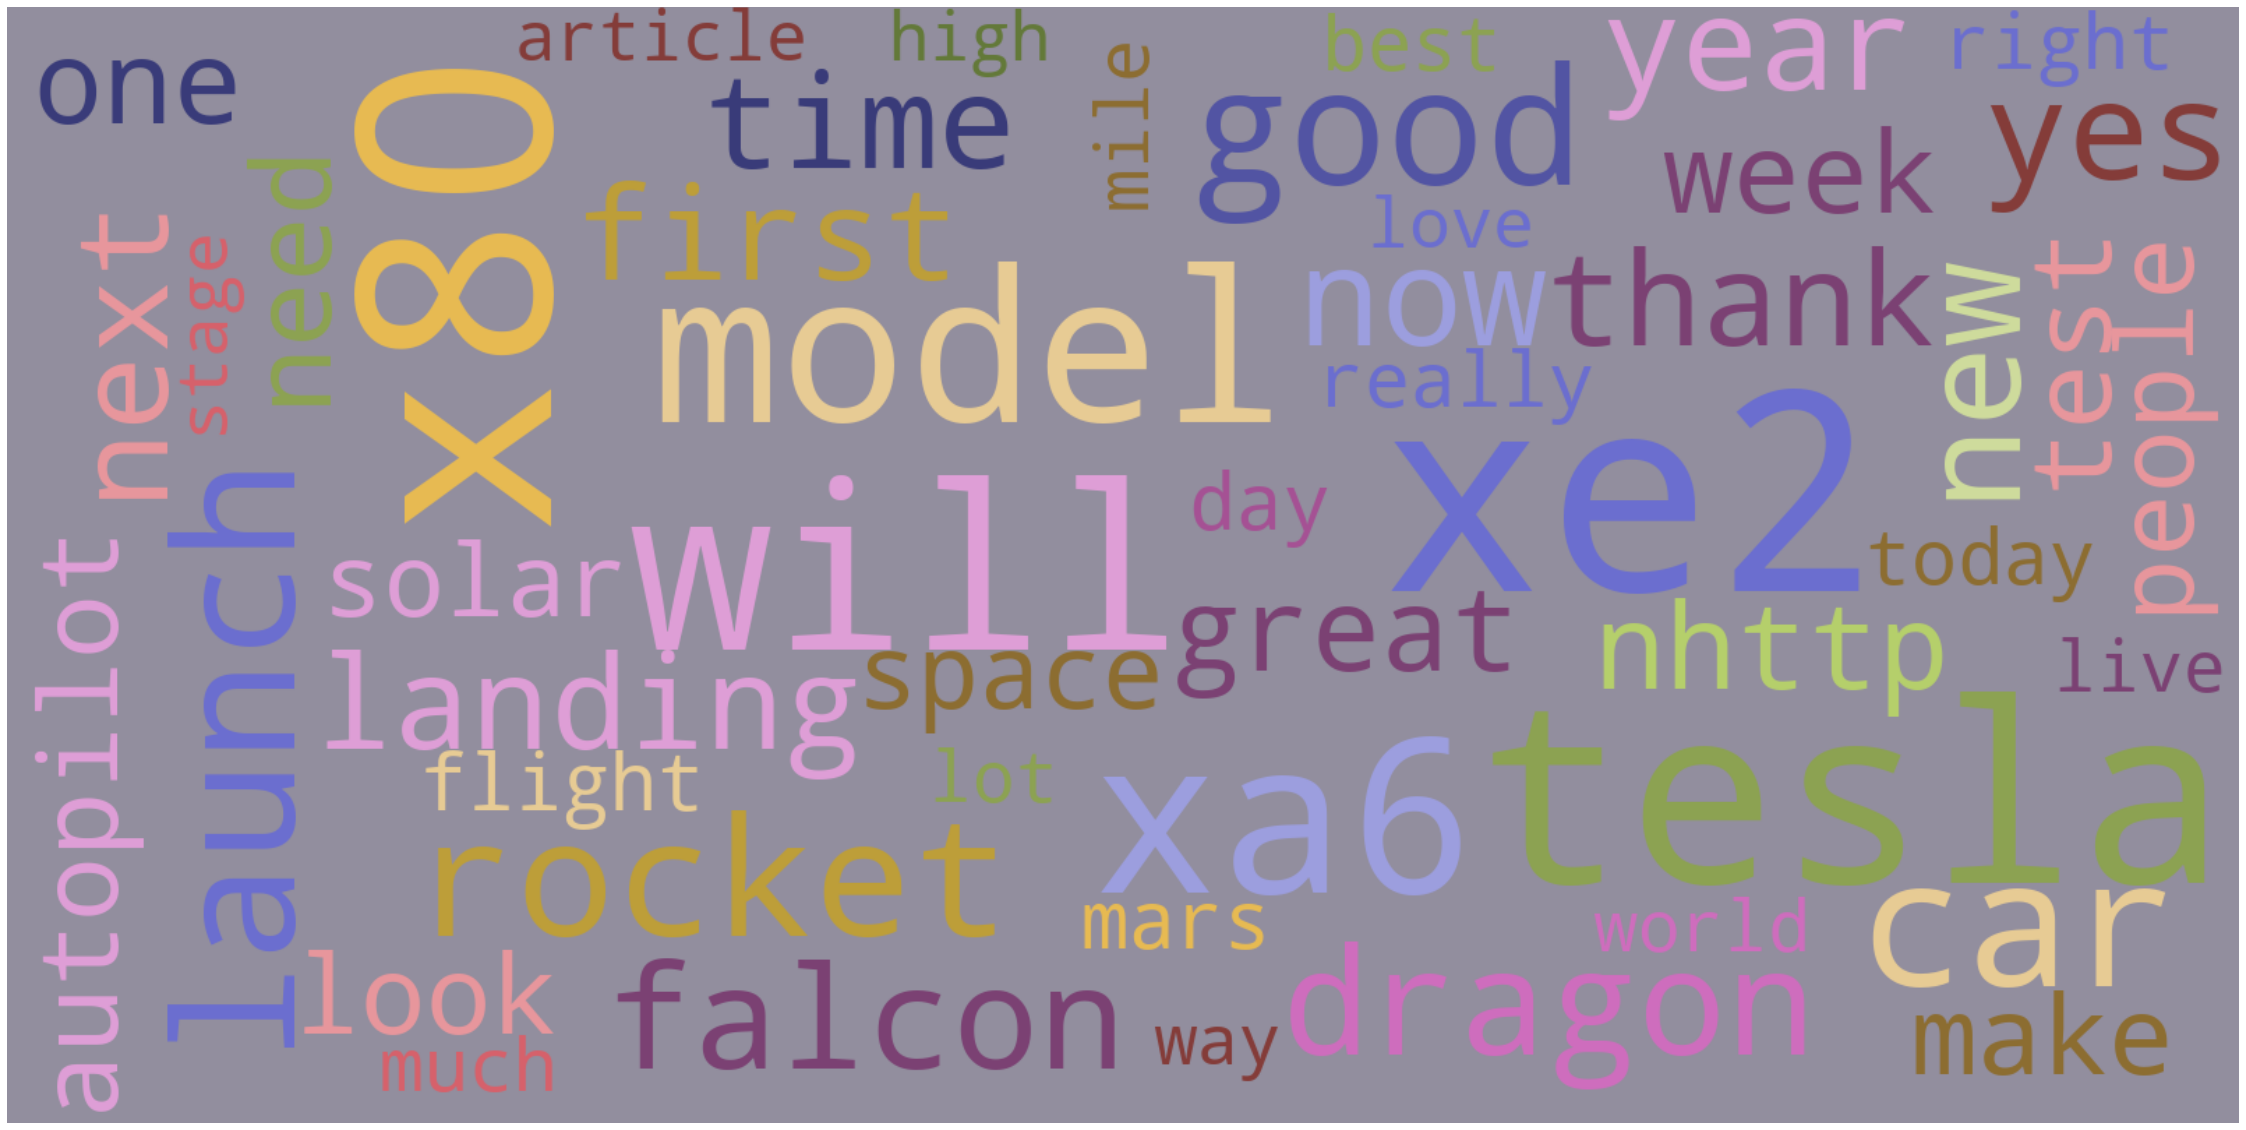

In [61]:
wordcloud = WordCloud(width=1600, stopwords=stopwords,height=800,max_font_size=200,max_words=50,collocations=False, colormap='tab20b',background_color='#928E9E').generate(string)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# WordClouds by Year

In [64]:
em_tweets['year'] = em_tweets['created_at'].dt.year
em_tweets

id          created_at  \
0     849636868052275200 2017-04-05 14:56:29   
1     848988730585096192 2017-04-03 20:01:01   
2     848943072423497728 2017-04-03 16:59:35   
3     848935705057280001 2017-04-03 16:30:19   
4     848416049573658624 2017-04-02 06:05:23   
...                  ...                 ...   
2814  142881284019060736 2011-12-03 08:22:07   
2815  142880871391838208 2011-12-03 08:20:28   
2816  142188458125963264 2011-12-01 10:29:04   
2817  142179928203460608 2011-12-01 09:55:11   
2818         15434727182 2010-06-04 18:31:57   

                                                                                                                                                            text  \
0                                                                                               b'And so the robots spared humanity ... https://t.co/v7JUJQWfCv'   
1     b"@ForIn2020 @waltmossberg @mims @defcon_5 Exactly. Tesla is absurdly overvalued if based on the past, but that's irr\xe2\x80\xa6 https://t.co/qQcTqkzgMl"   
2                                                                                                                  b'@waltmossberg @mims @defcon_5 Et tu, Walt?'   
3                                                                                                                            b'Stormy weather in Shortville ...'   
4                                                                              b"@DaveLeeBBC @verge Coal is dying due to nat gas fracking. It's basically dead."   
...                                                                                                                                                          ...   
2814                                                                                                                        b'That was a total non sequitur btw'   
2815                 b'Great Voltaire quote, arguably better than Twain. Hearing news of his own death, Voltaire replied the reports were true, only premature.'   
2816                                    b'I made the volume on the Model S http://t.co/wMCnT53M go to 11.  Now I just need to work in a miniature Stonehenge...'   
2817             b"Went to Iceland on Sat to ride bumper cars on ice!  No, not the country, Vlad's rink in Van Nuys. Awesome family fun :) http://t.co/rBQXJ9IT"   
2818                                                             b'Please ignore prior tweets, as that was someone pretending to be me :)  This is actually me.'   

      month_of_date  hour  \
0                 4    14   
1                 4    20   
2                 4    16   
3                 4    16   
4                 4     6   
...             ...   ...   
2814             12     8   
2815             12     8   
2816             12    10   
2817             12     9   
2818              6    18   

                                                                                                                                       text_decode  \
0                                                                                    And so the robots spared humanity ... https://t.co/v7JUJQWfCv   
1     @ForIn2020 @waltmossberg @mims @defcon_5 Exactly. Tesla is absurdly overvalued if based on the past, but that's irr… https://t.co/qQcTqkzgMl   
2                                                                                                       @waltmossberg @mims @defcon_5 Et tu, Walt?   
3                                                                                                                 Stormy weather in Shortville ...   
4                                                                   @DaveLeeBBC @verge Coal is dying due to nat gas fracking. It's basically dead.   
...                                                                                                                                            ...   
2814                                                                         

In [67]:
em_tweets_2017 = pysqldf("SELECT text FROM em_tweets WHERE year = 2017;")
em_tweets_2016 = pysqldf("SELECT text FROM em_tweets WHERE year = 2016;")
em_tweets_2015 = pysqldf("SELECT text FROM em_tweets WHERE year = 2015;")
em_tweets_2014 = pysqldf("SELECT text FROM em_tweets WHERE year = 2014;")
em_tweets_2013 = pysqldf("SELECT text FROM em_tweets WHERE year = 2013;")
em_tweets_2012 = pysqldf("SELECT text FROM em_tweets WHERE year = 2012;")
em_tweets_2011 = pysqldf("SELECT text FROM em_tweets WHERE year = 2011;")

text
0                b"World violence being super low is probably counter-intuitive to most people. That's because modern media is a misery microscope."
1        b"Here's a happy thought for 2012: world violence is at an all time historical low. Excellent piece by Stephen Pinker http://t.co/gv4MLfQe"
2                                             b'Hacked my Tesla charge connector on a small island in the rain last night #whatcouldpossiblygowrong'
3            b'Not that this really matters. All current rocket tech, including ours, sucks. Only when it becomes fully reusable, will it not suck.'
4        b'SpaceX has Boeing, Lockheed, Europe (Ariane) and Russia (Proton/Soyuz) near checkmate in rocket technology. End game is all about China.'
5                                                                                     b'China unveils ambitious space strategy http://t.co/udHmuft2'
6       b'To be clear, CtG absolutely did *not* bang her horse. They were just close friends who liked to take showers together and spoon at night.'
7   b'Right mood, scented candles, Barry White singing "Can\'t Get Enough of Your Love, Baby" and the magic (by that I mean horsef*ing) happens ...'
8          b"I'm just saying that u shouldn't pass judgment based on one night of passion. Sometimes things just happen and u go with the moment :)"
9       b"Sew one button, doesn't make u a tailor; cook one meal, doesn't make u a chef; but f* one horse and u r a horsef*er for all of history..."
10              b"Am reading Robert Massie's book on Catherine the Great. Yeah, I know what you're probably thinking ... did she really f* a horse?"
11   b'Am not saying that is *necessarily* good or bad, but reality will force us to live with the consequences of our actions http://t.co/fnXmhUok'
12     b"Interesting Economist article about how humanity's collective actions have created a fundamentally new geological age -- the Anthropocene."
13      b'@om Cool personal essay. It really resonated with me, as I felt the same way after coming very close to dying from malaria ten years ago.'
14          b'@richardbranson Liked "Screw Business as Usual" a lot. This approach should be taken to heart by all, as it really is the smart move.'
15          b'@kanyewest Just returned from Haiti. For those who want to help, I recommend donating to MSF, UNICEF and Artists for Peace & Justice.'
16                                                  b'RT @TheOnion: Any Idiot Could Have Come Up With The Car http://t.co/e9cLgfEg #OnionInnovation'
17                                                                                                                           b'@TheOnion So true :)'
18                          b'If you ever wanted to know the *real* truth about the moon landings ...(best Onion article ever) http://t.co/pgNEJsjI'
19             b'RT @TheOnion: Vending Machine Attendant Admits B3 Selection Has Changed A Lot Over The Years http://t.co/nccSGzCQ #OnionInnovation'
20                                               b'Walked around a neighborhood recently rebuilt with help from APJ and others http://t.co/KYHjsS1k'
21                           b"It was Xmas, so we brought presents for the kids at the orphanage. They don't usually get much. http://t.co/r8qfluIG"
22                    b'Met with UNICEF, Doctors Without Borders and Artists for Peace & Justice. I support them and would recommend others do too.'
23                            b'Just returned from a trip to Haiti. Covered a lot of ground and saw many tough situations. They need a lot of help.'
24                                                                          b'Single character Tweets are the ulitmate extension of the Twitmeme...'
25                                                                                                                                              b'I'
26    b'The Russians are having some challenges with their rockets. Too many of the engineers that designed them have ret

In [69]:
print("Cleaning the tweets 2017...\n")
cleaned_tweets_2017 = []
for i in range(0,len(em_tweets_2017)): 
    if( (i+1)%100 == 0 ):
        print("Tweets {} of {} have been processed".format(i+1,len(em_tweets_2017)))                                                                  
    cleaned_tweets_2017.append(cleaning_tweets((em_tweets_2017.text[i])))

Cleaning the tweets 2017...

Tweets 100 of 377 have been processed
Tweets 200 of 377 have been processed
Tweets 300 of 377 have been processed


## Tweets 2017

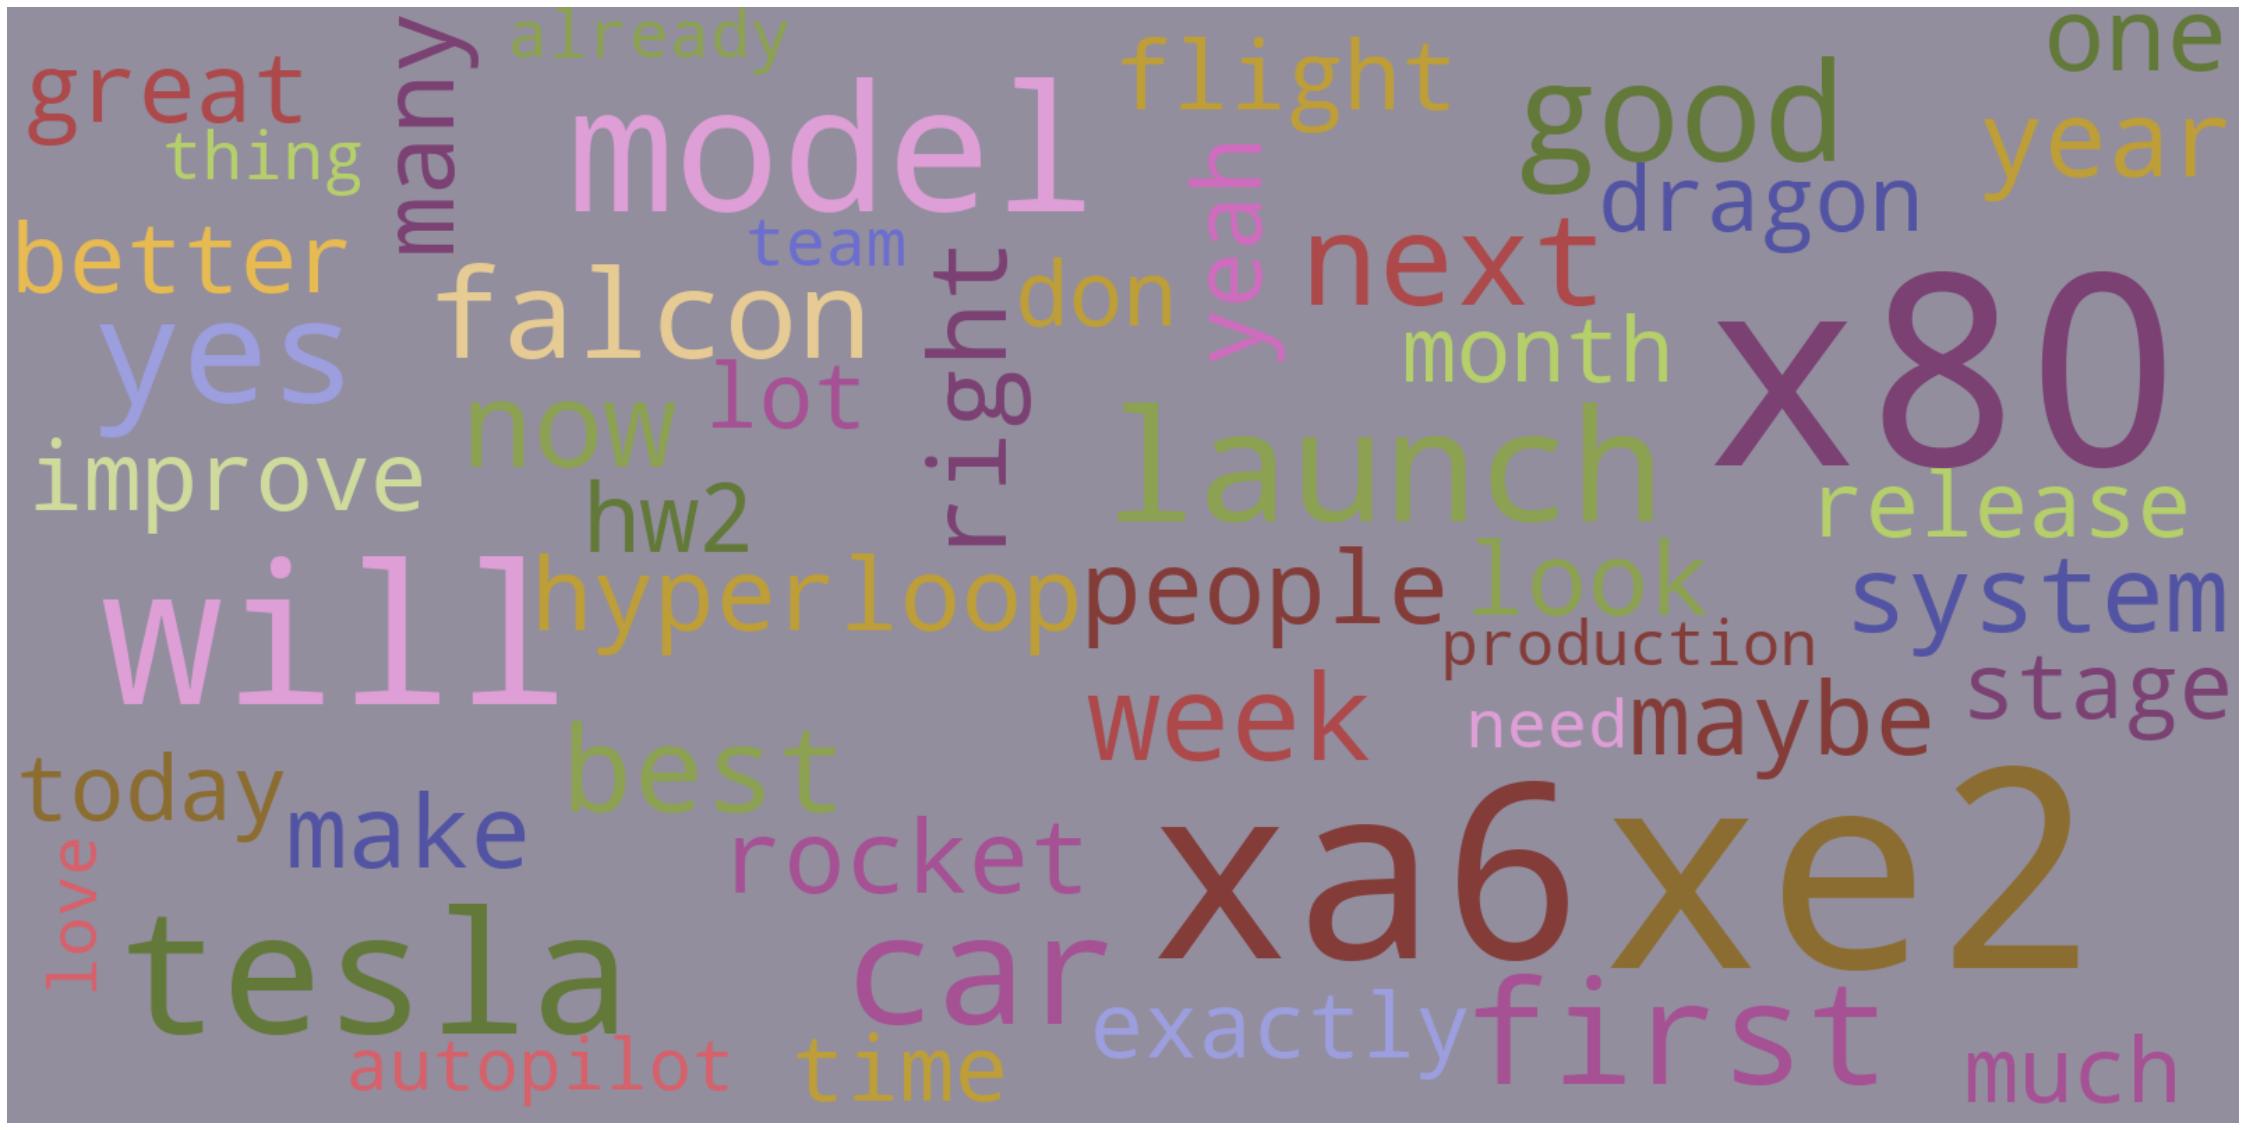

In [70]:
string_2017 = pd.Series(cleaned_tweets_2017).str.cat(sep=' ')
wordcloud = WordCloud(width=1600, stopwords=stopwords,height=800,max_font_size=200,max_words=50,collocations=False, colormap='tab20b',background_color='#928E9E').generate(string_2017)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Tweets 2016

Cleaning the tweets 2016...

Tweets 100 of 935 have been processed
Tweets 200 of 935 have been processed
Tweets 300 of 935 have been processed
Tweets 400 of 935 have been processed
Tweets 500 of 935 have been processed
Tweets 600 of 935 have been processed
Tweets 700 of 935 have been processed
Tweets 800 of 935 have been processed
Tweets 900 of 935 have been processed


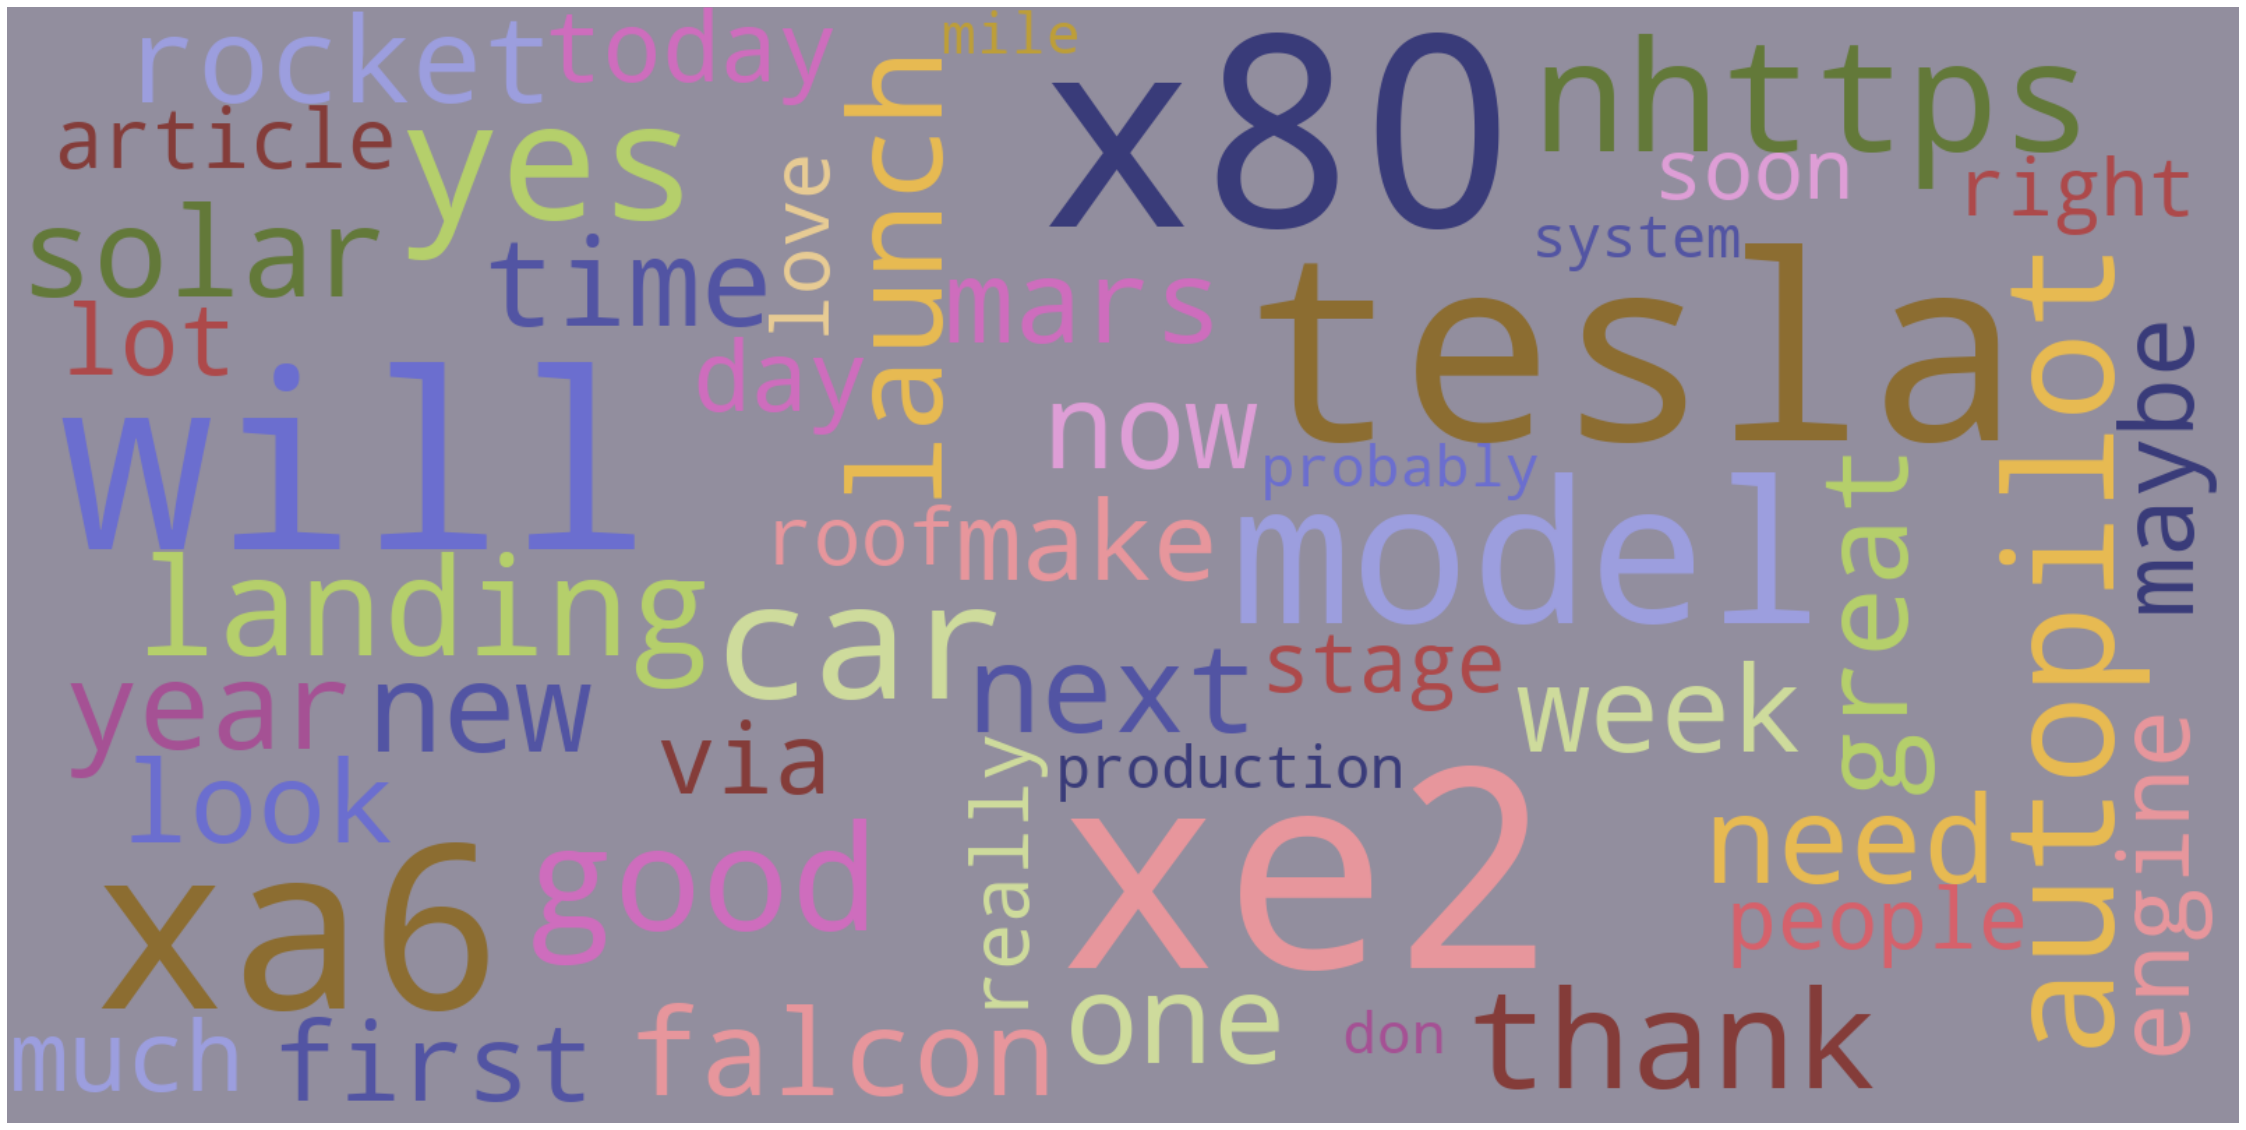

In [71]:
print("Cleaning the tweets 2016...\n")
cleaned_tweets_2016 = []
for i in range(0,len(em_tweets_2016)): 
    if( (i+1)%100 == 0 ):
        print("Tweets {} of {} have been processed".format(i+1,len(em_tweets_2016)))                                                                  
    cleaned_tweets_2016.append(cleaning_tweets((em_tweets_2016.text[i])))
    string_2016 = pd.Series(cleaned_tweets_2016).str.cat(sep=' ')
wordcloud = WordCloud(width=1600, stopwords=stopwords,height=800,max_font_size=200,max_words=50,collocations=False, colormap='tab20b',background_color='#928E9E').generate(string_2016)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Tweets 2015

Cleaning the tweets 2015...

Tweets 100 of 436 have been processed
Tweets 200 of 436 have been processed
Tweets 300 of 436 have been processed
Tweets 400 of 436 have been processed


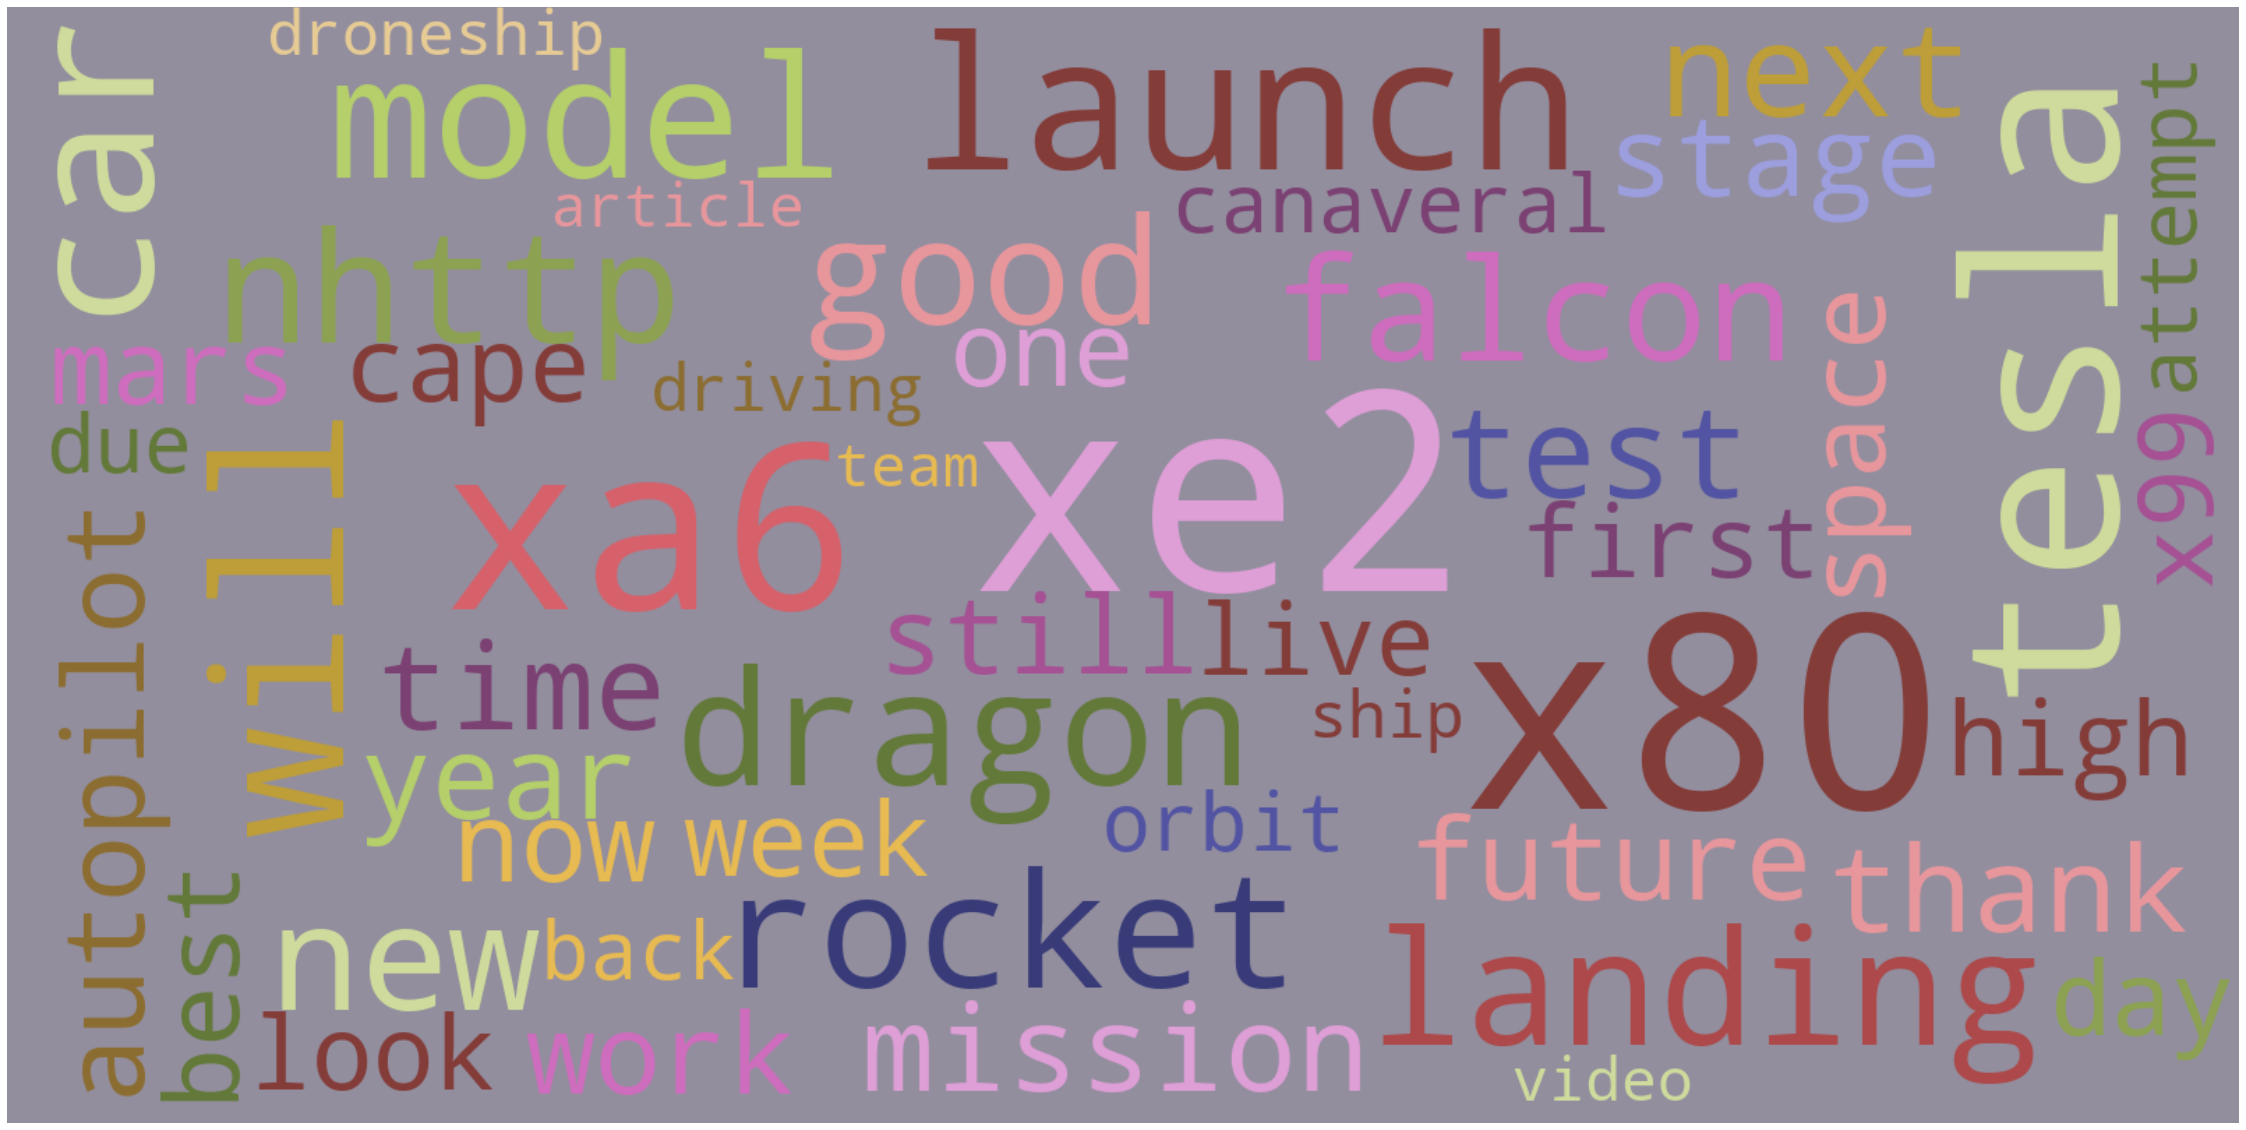

In [72]:
print("Cleaning the tweets 2015...\n")
cleaned_tweets_2015 = []
for i in range(0,len(em_tweets_2015)): 
    if( (i+1)%100 == 0 ):
        print("Tweets {} of {} have been processed".format(i+1,len(em_tweets_2015)))                                                                  
    cleaned_tweets_2015.append(cleaning_tweets((em_tweets_2015.text[i])))
    string_2015 = pd.Series(cleaned_tweets_2015).str.cat(sep=' ')
wordcloud = WordCloud(width=1600, stopwords=stopwords,height=800,max_font_size=200,max_words=50,collocations=False, colormap='tab20b',background_color='#928E9E').generate(string_2015)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Tweets 2014

Cleaning the tweets 2014...

Tweets 100 of 232 have been processed
Tweets 200 of 232 have been processed


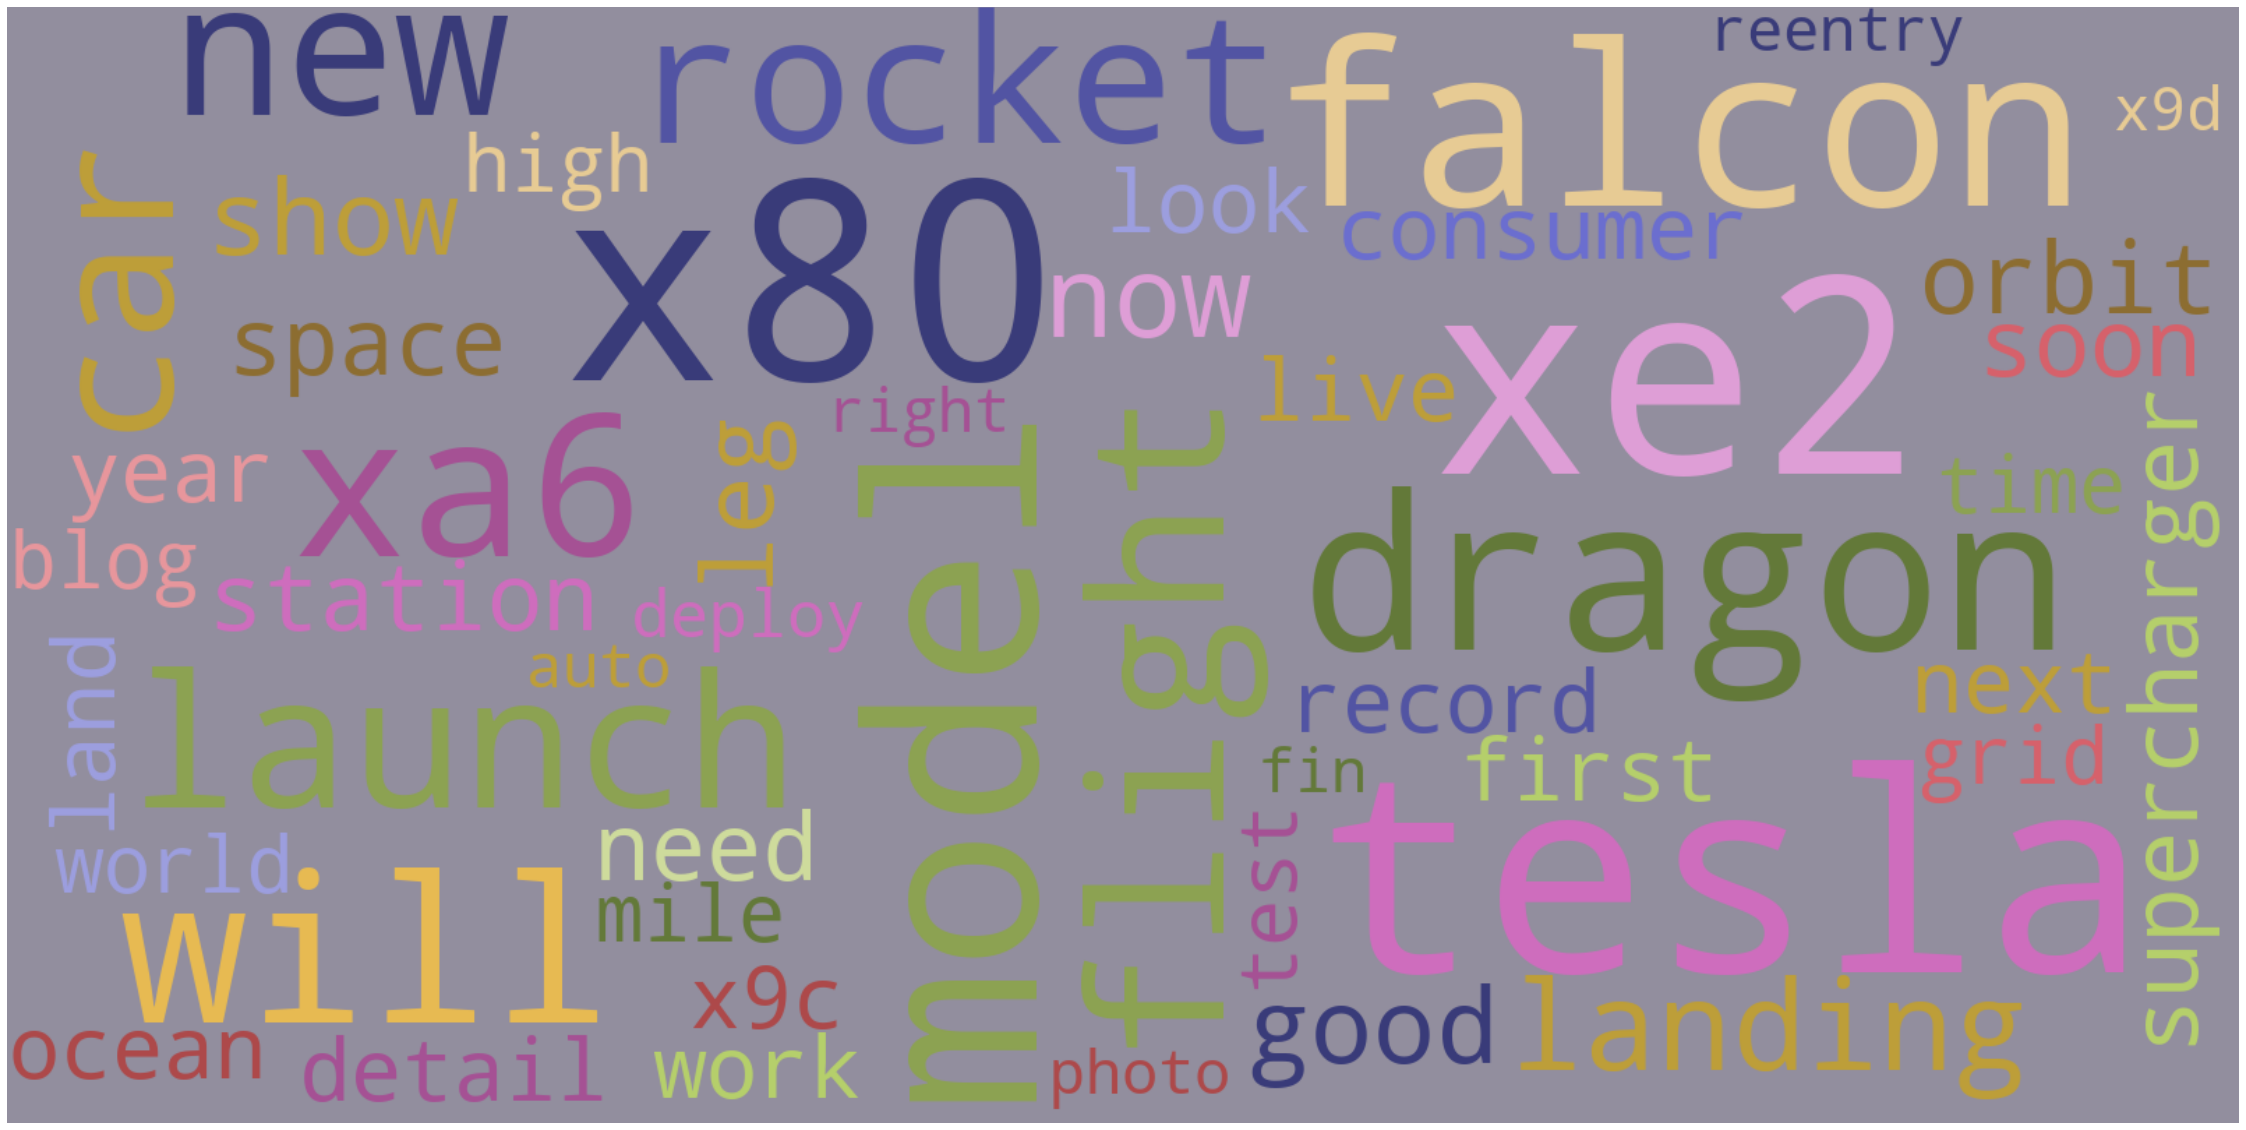

In [73]:
print("Cleaning the tweets 2014...\n")
cleaned_tweets_2014 = []
for i in range(0,len(em_tweets_2014)): 
    if( (i+1)%100 == 0 ):
        print("Tweets {} of {} have been processed".format(i+1,len(em_tweets_2014)))                                                                  
    cleaned_tweets_2014.append(cleaning_tweets((em_tweets_2014.text[i])))
    string_2014 = pd.Series(cleaned_tweets_2014).str.cat(sep=' ')
wordcloud = WordCloud(width=1600, stopwords=stopwords,height=800,max_font_size=200,max_words=50,collocations=False, colormap='tab20b',background_color='#928E9E').generate(string_2014)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Tweets 2013

Cleaning the tweets 2013...

Tweets 100 of 478 have been processed
Tweets 200 of 478 have been processed
Tweets 300 of 478 have been processed
Tweets 400 of 478 have been processed


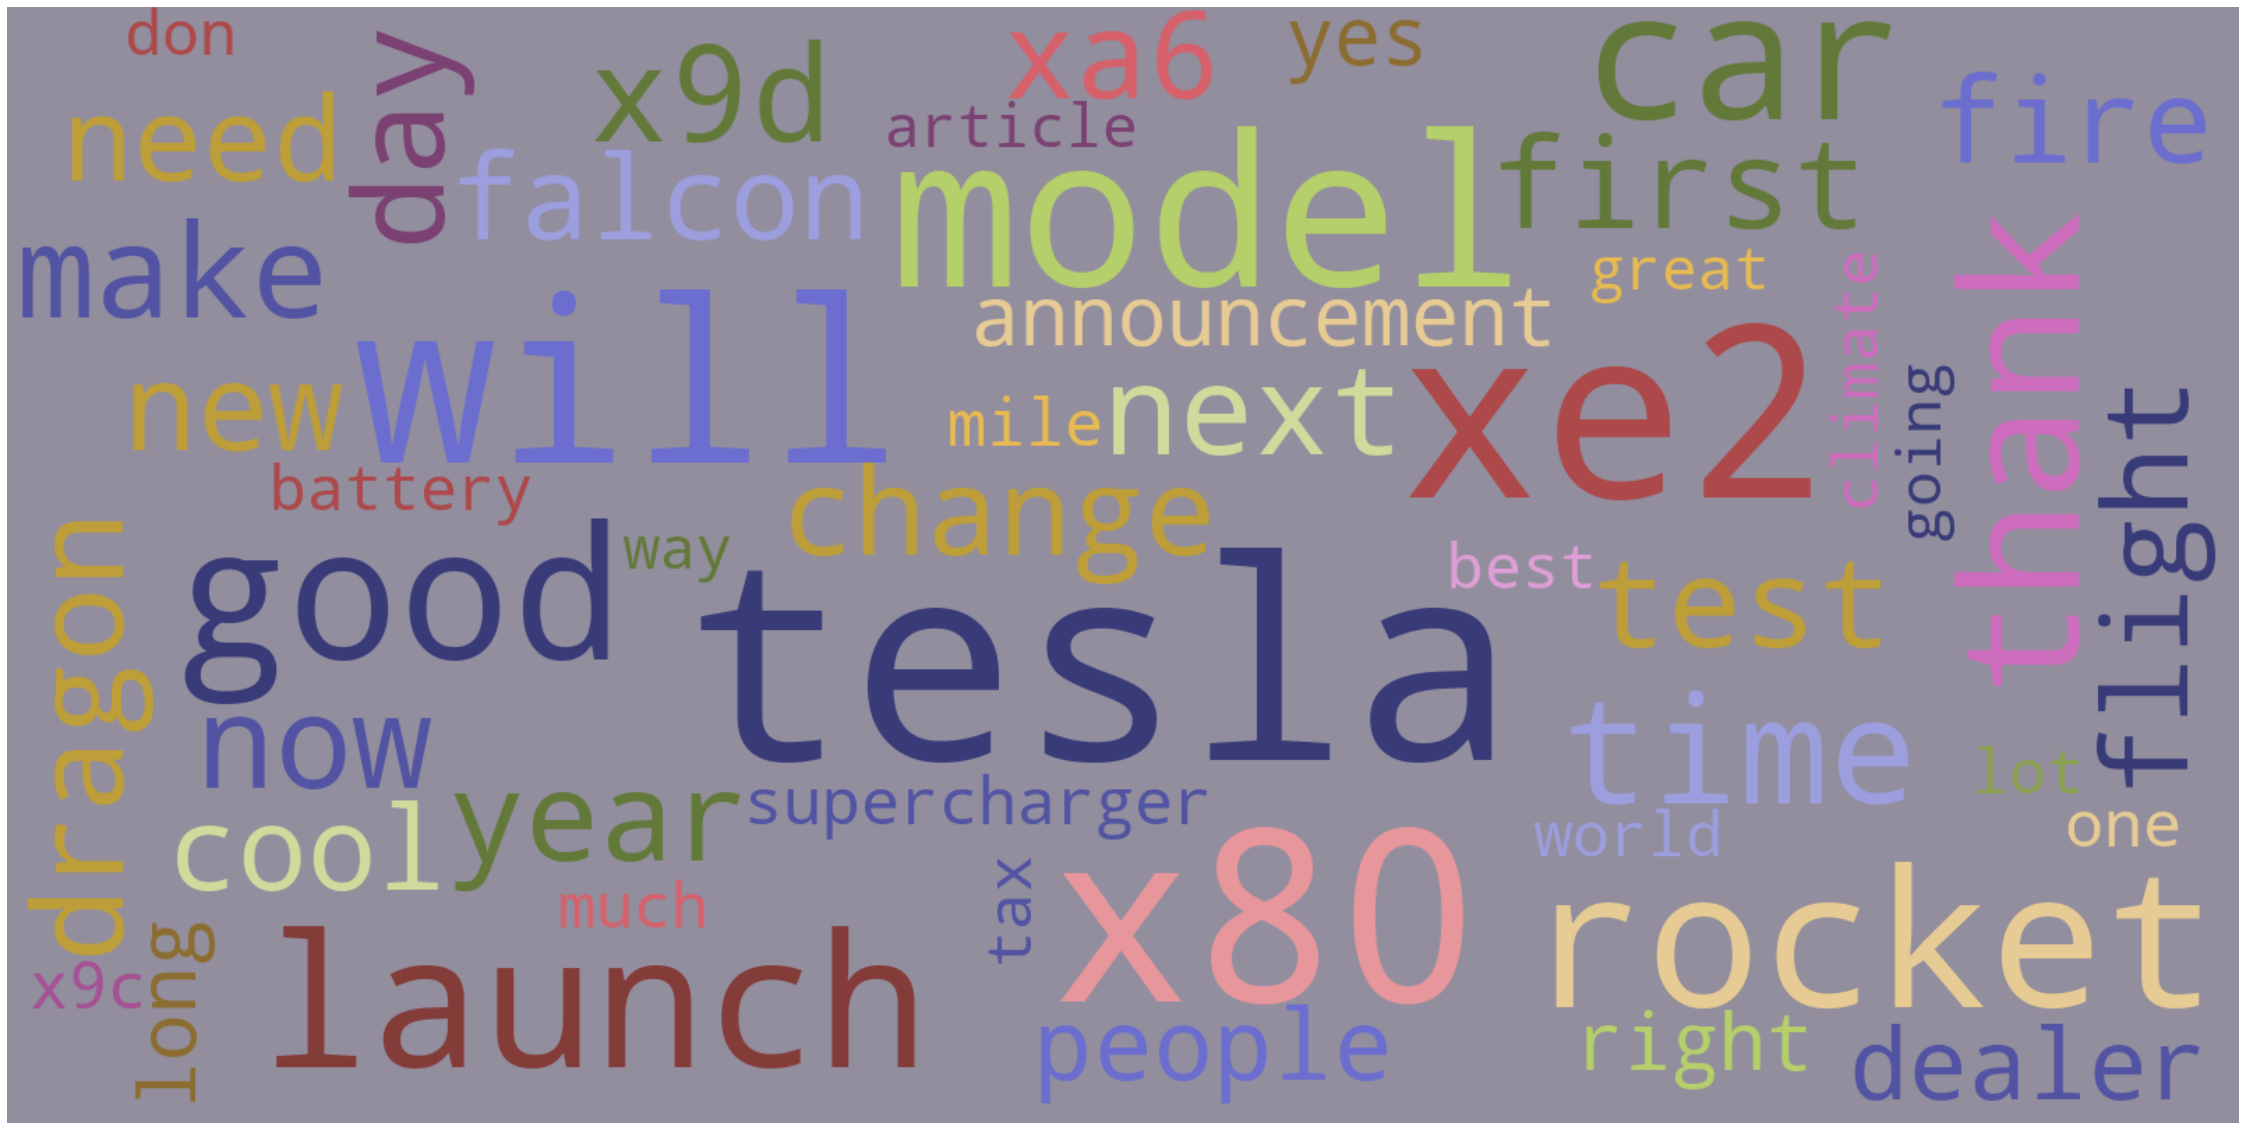

In [74]:
print("Cleaning the tweets 2013...\n")
cleaned_tweets_2013 = []
for i in range(0,len(em_tweets_2013)): 
    if( (i+1)%100 == 0 ):
        print("Tweets {} of {} have been processed".format(i+1,len(em_tweets_2013)))                                                                  
    cleaned_tweets_2013.append(cleaning_tweets((em_tweets_2013.text[i])))
    string_2013 = pd.Series(cleaned_tweets_2013).str.cat(sep=' ')
wordcloud = WordCloud(width=1600, stopwords=stopwords,height=800,max_font_size=200,max_words=50,collocations=False, colormap='tab20b',background_color='#928E9E').generate(string_2013)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Tweets 2012

Cleaning the tweets 2012...

Tweets 100 of 316 have been processed
Tweets 200 of 316 have been processed
Tweets 300 of 316 have been processed


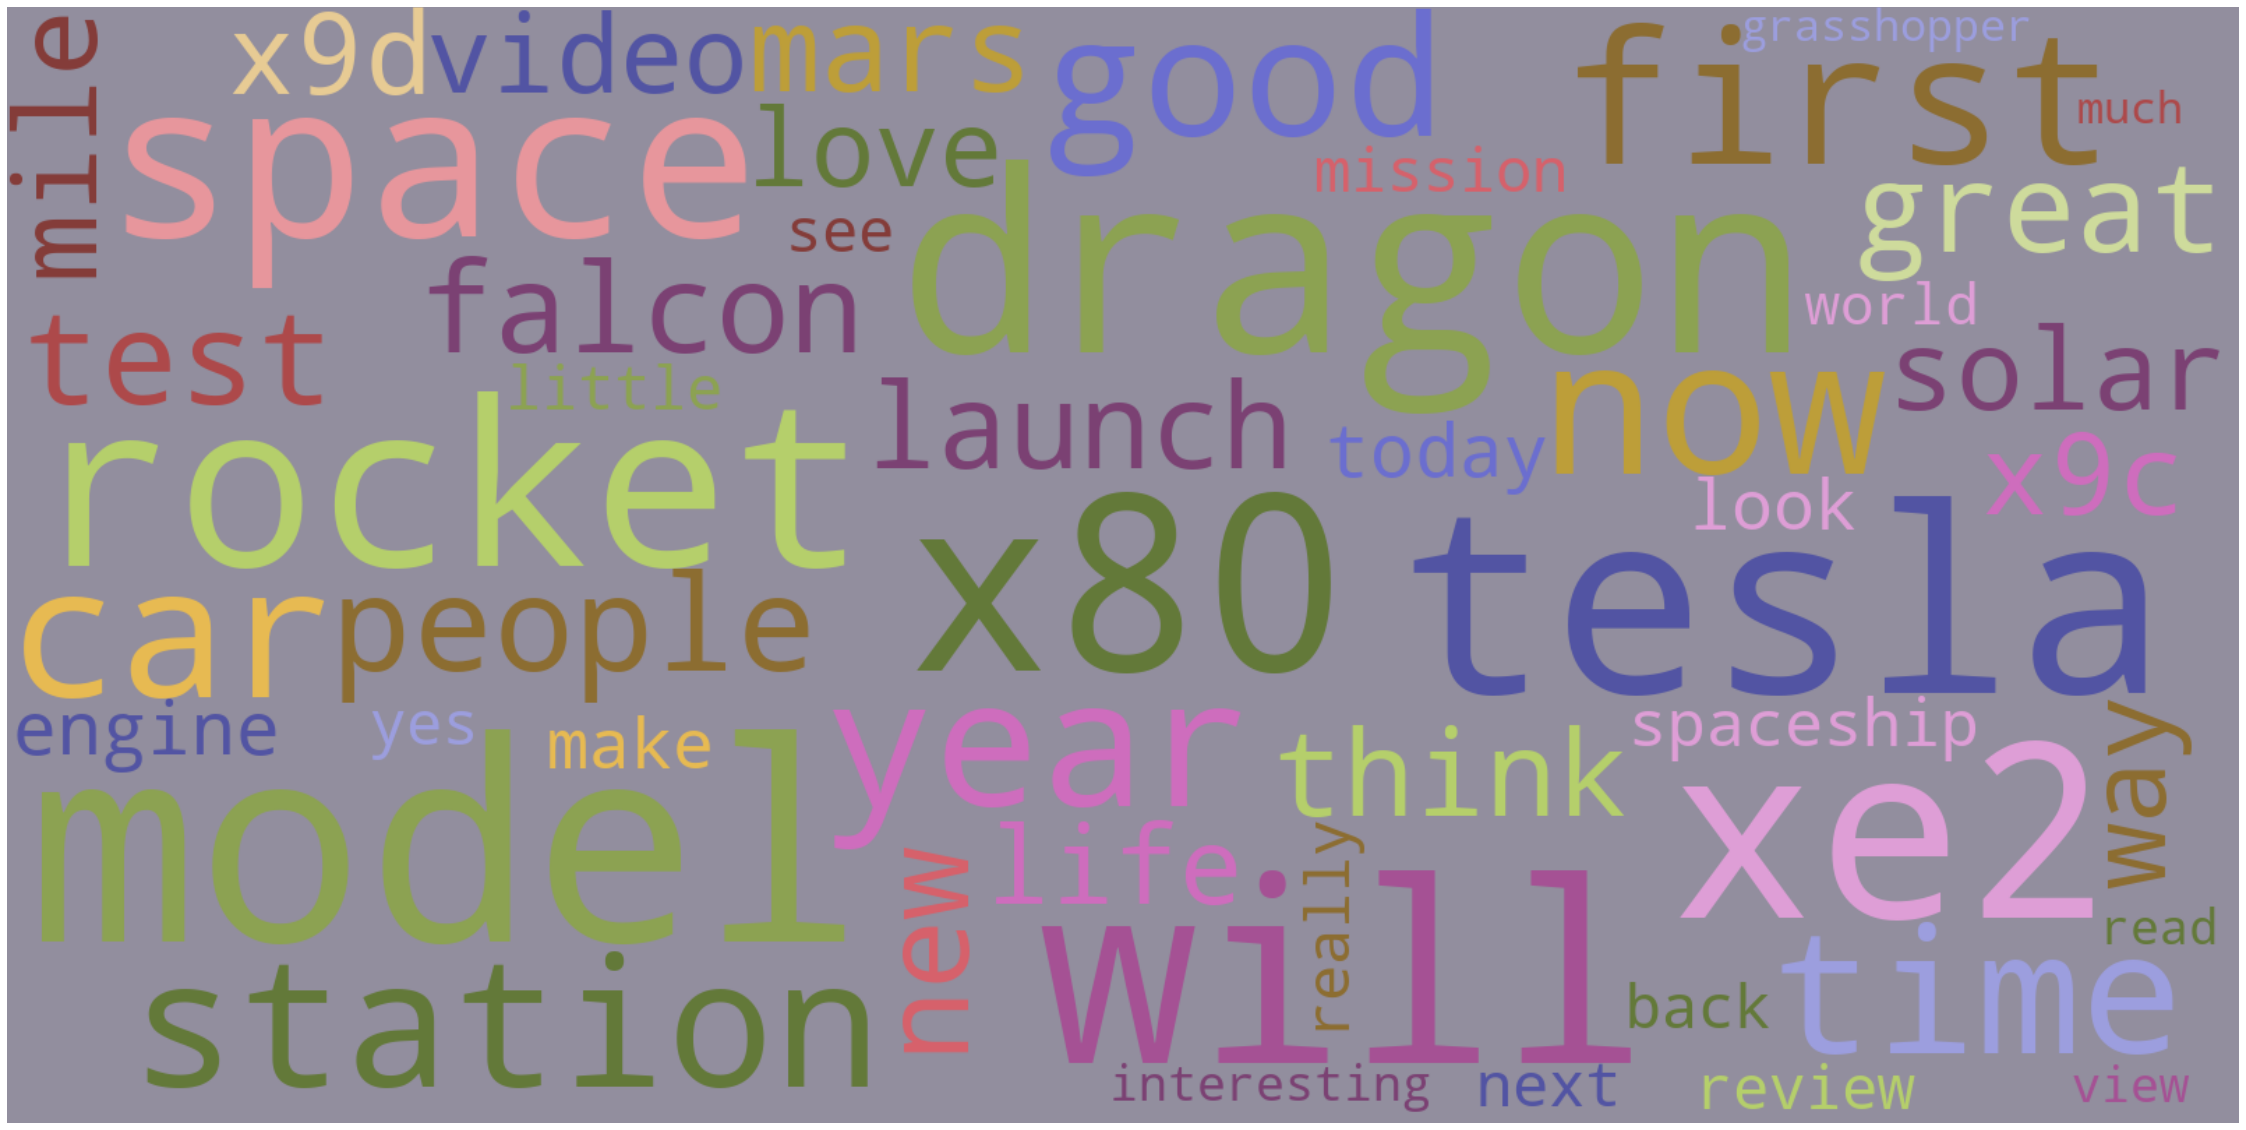

In [75]:
print("Cleaning the tweets 2012...\n")
cleaned_tweets_2012 = []
for i in range(0,len(em_tweets_2012)): 
    if( (i+1)%100 == 0 ):
        print("Tweets {} of {} have been processed".format(i+1,len(em_tweets_2012)))                                                                  
    cleaned_tweets_2012.append(cleaning_tweets((em_tweets_2012.text[i])))
    string_2012 = pd.Series(cleaned_tweets_2012).str.cat(sep=' ')
wordcloud = WordCloud(width=1600, stopwords=stopwords,height=800,max_font_size=200,max_words=50,collocations=False, colormap='tab20b',background_color='#928E9E').generate(string_2012)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Tweets 2011

Cleaning the tweets 2011...



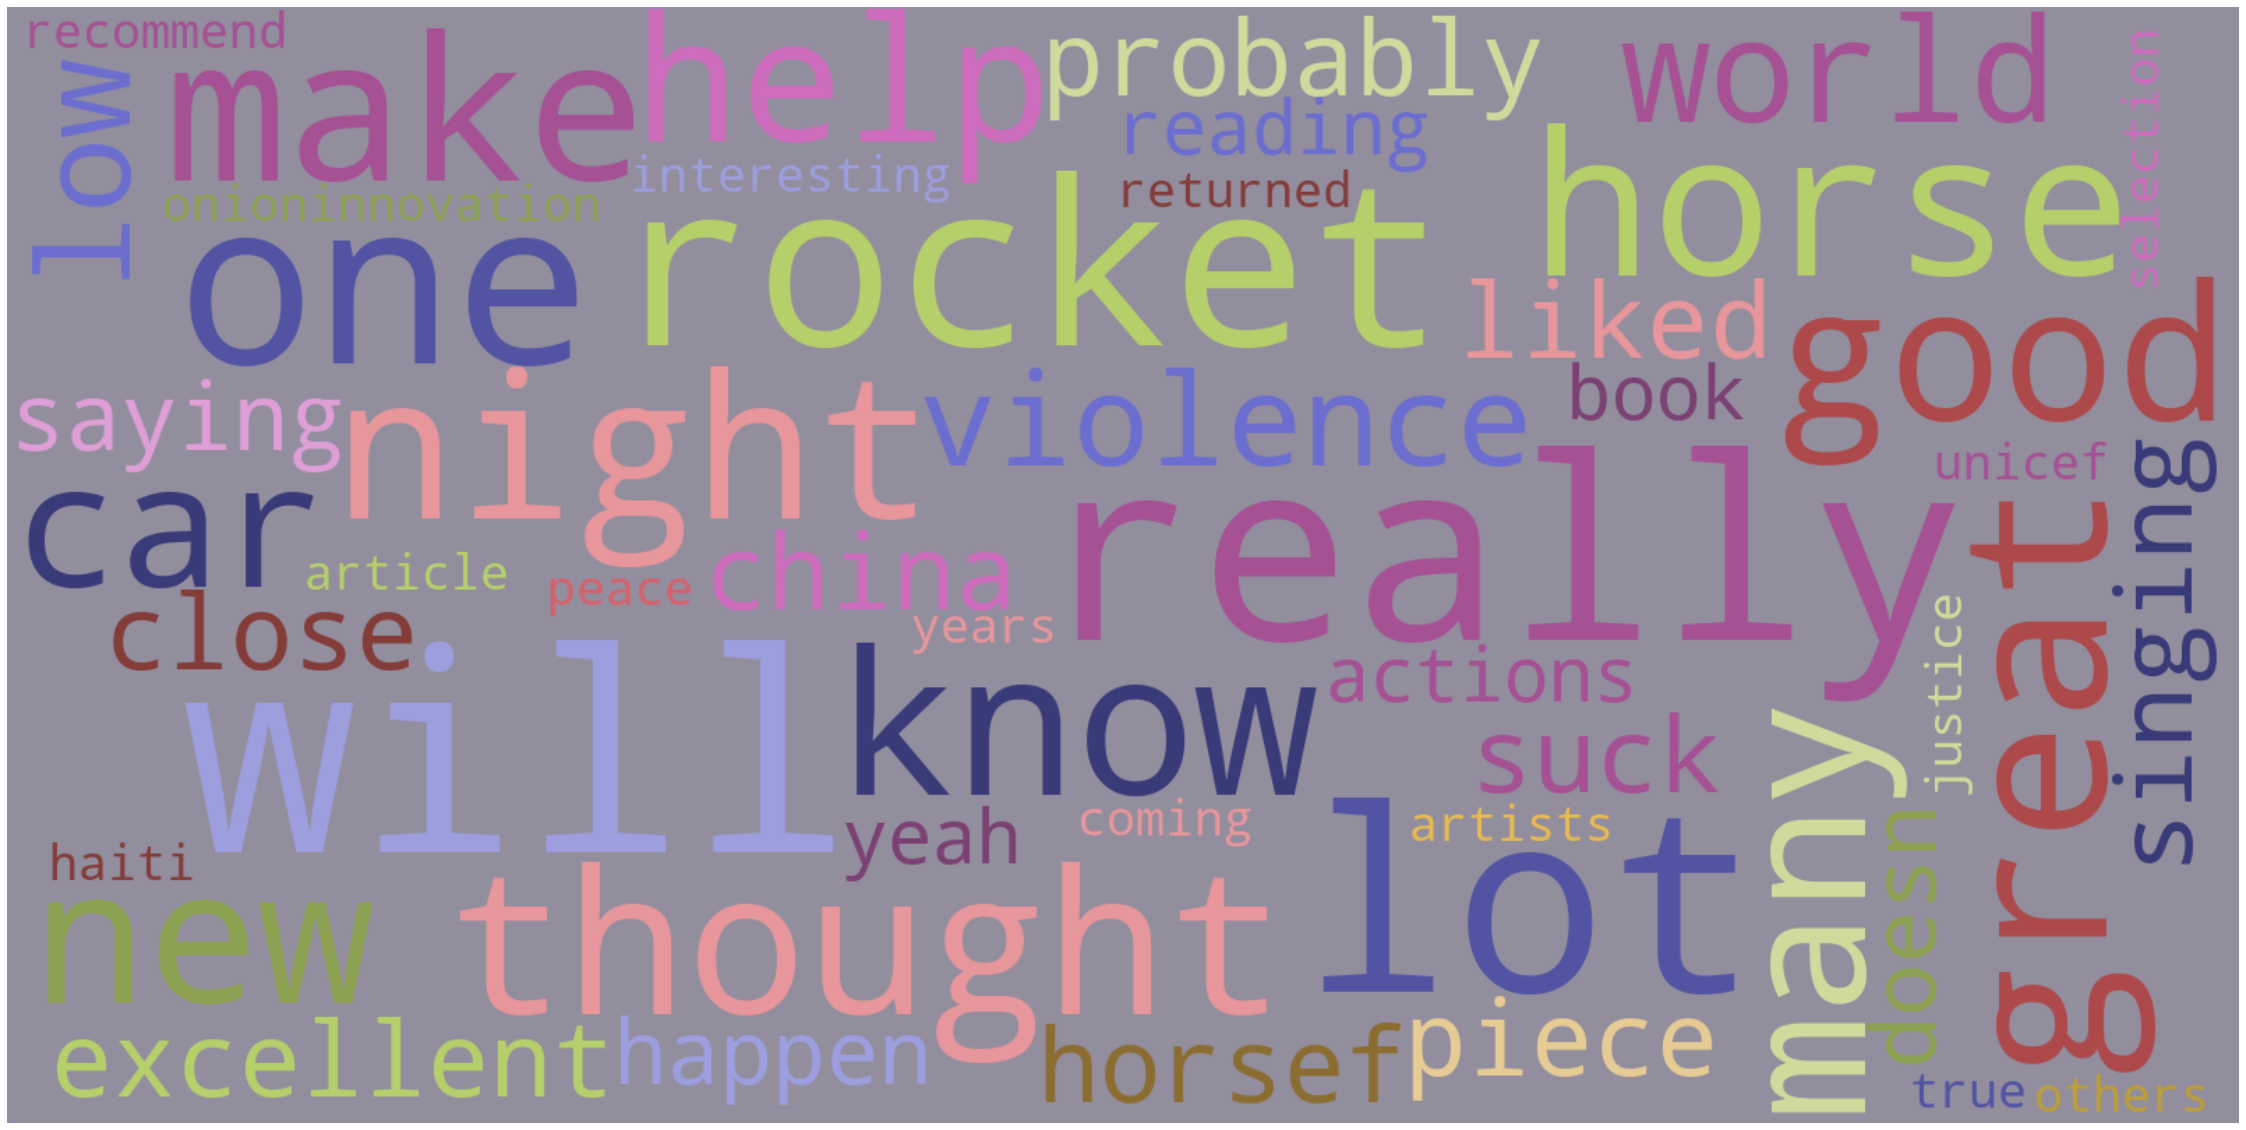

In [76]:
print("Cleaning the tweets 2011...\n")
cleaned_tweets_2011 = []
for i in range(0,len(em_tweets_2011)): 
    if( (i+1)%100 == 0 ):
        print("Tweets {} of {} have been processed".format(i+1,len(em_tweets_2011)))                                                                  
    cleaned_tweets_2011.append(cleaning_tweets((em_tweets_2011.text[i])))
    string_2011 = pd.Series(cleaned_tweets_2011).str.cat(sep=' ')
wordcloud = WordCloud(width=1600, stopwords=stopwords,height=800,max_font_size=200,max_words=50,collocations=False, colormap='tab20b',background_color='#928E9E').generate(string_2011)
plt.figure(figsize=(40,30))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()